In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM, GRU
from tensorflow import keras
import tensorflow as tf
from datetime import datetime

2022-11-17 13:53:38.543382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = read_csv("folder/subfolder/dataToModel.csv",
                 #  parse_dates={'dt' : ['Time']},
                  # infer_datetime_format=True, 
                   index_col= 0,
                   #na_values=['nan','?'],
                   sep=";")
#dataset.fillna(0, inplace=True)
values = dataset.values
# ensure all data is float
values = values.astype('float32')

In [3]:
dataset.head(4)

rok  ms  dz  godz  fco2_MQ  fco2_HQ  fco2_raw  glwody  T50cm  T2m  ...  \
0  2013   1   1   0.5     0.15      0.0      0.15     5.2    1.2  1.5  ...   
1  2013   1   1   1.5    -0.60      0.0     -0.60     5.2    0.9  1.2  ...   
2  2013   1   1   2.5     0.57      0.0      0.57     5.4    0.7  1.0  ...   
3  2013   1   1   3.5     0.03      0.0      0.03     5.5    0.3  0.6  ...   

    Ku     Ld     Lu    ppp    v   vdir  Tgrunt    vwc  PARd  PARu  
0  0.9  249.3  322.9  998.5  3.4  210.5     0.6  0.785   0.0   0.0  
1  1.0  249.5  323.5  998.1  3.3  202.5     0.6  0.785   0.0   0.0  
2  1.0  249.7  324.0  997.6  3.3  201.6     0.6  0.785   0.0   0.0  
3  0.9  250.0  324.5  997.2  2.6  191.6     0.6  0.785   0.0   0.0  

[4 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [5]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
#dataset.drop(columns  = [ 'fMOD_NN', 'fMOD_E0', 'fMODlut', 'fMODsrr','dz','godz','ms','fco2_MQ'], inplace = True)

In [6]:
dataset.head()

fco2_HQ  fco2_raw  glwody  T50cm  T2m   Kd   Ku     Ld     Lu    ppp    v  \
0      0.0      0.15     5.2    1.2  1.5  0.0  0.9  249.3  322.9  998.5  3.4   
1      0.0     -0.60     5.2    0.9  1.2  0.0  1.0  249.5  323.5  998.1  3.3   
2      0.0      0.57     5.4    0.7  1.0  0.0  1.0  249.7  324.0  997.6  3.3   
3      0.0      0.03     5.5    0.3  0.6  0.0  0.9  250.0  324.5  997.2  2.6   
4      0.0      0.03     5.5   -0.4 -0.0  0.0  1.5  250.2  325.1  996.8  2.2   

    vdir  Tgrunt    vwc  PARd  PARu  
0  210.5     0.6  0.785   0.0   0.0  
1  202.5     0.6  0.785   0.0   0.0  
2  201.6     0.6  0.785   0.0   0.0  
3  191.6     0.6  0.785   0.0   0.0  
4  189.1     0.6  0.785   0.0   0.0

In [7]:
dataset.drop(columns =[] , inplace = True)

In [8]:
#final dataset
dataset.head(2220)

fco2_HQ  fco2_raw  glwody  T50cm   T2m     Kd    Ku     Ld     Lu  \
0         0.0      0.15     5.2    1.2   1.5    0.0   0.9  249.3  322.9   
1         0.0     -0.60     5.2    0.9   1.2    0.0   1.0  249.5  323.5   
2         0.0      0.57     5.4    0.7   1.0    0.0   1.0  249.7  324.0   
3         0.0      0.03     5.5    0.3   0.6    0.0   0.9  250.0  324.5   
4         0.0      0.03     5.5   -0.4  -0.0    0.0   1.5  250.2  325.1   
...       ...       ...     ...    ...   ...    ...   ...    ...    ...   
2215      1.0     -5.00     3.6   20.4  19.5  665.8  80.1  327.0  443.0   
2216      1.0     -6.26     3.4   21.6  20.8  770.0  85.6  332.4  455.7   
2217      1.0     -0.04     3.2   22.5  21.9  841.9  91.9  337.6  465.5   
2218      0.0     -2.90     3.1   23.1  22.5  876.3  98.5  340.0  471.3   
2219      0.0     -5.18     3.2   23.9  23.6  856.8  97.2  344.3  477.2   

         ppp    v   vdir  Tgrunt    vwc    PARd  PARu  
0      998.5  3.4  210.5     0.6  0.785     0.0   0.0  
1      998.1  3.3  202.5     0.6  0.785     0.0   0.0  
2      997.6  3.3  201.6     0.6  0.785     0.0   0.0  
3      997.2  2.6  191.6     0.6  0.785     0.0   0.0  
4      996.8  2.2  189.1     0.6  0.785     0.0   0.0  
...      ...  ...    ...     ...    ...     ...   ...  
2215  1001.2  0.6   19.7    17.4  0.774  1347.1  70.6  
2216  1000.9  1.1    2.0    17.6  0.774  1575.5  70.7  
2217  1000.9  1.4   38.9    17.9  0.773  1738.3  74.9  
2218  1000.7  1.2   81.7    18.5  0.773  1798.4  85.1  
2219  1000.6  0.8  129.9    19.1  0.773  1745.1  79.8  

[2220 rows x 16 columns]

In [9]:
values = dataset.values
# ensure all data is float
values = values.astype('float64')

In [10]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled =pd.DataFrame(scaled)

In [11]:
scaled.head(2220)

0         1         2         3         4         5         6   \
0     0.0  0.518109  0.869646  0.413005  0.423423  0.000000  0.001652   
1     0.0  0.517643  0.869646  0.407733  0.418018  0.000000  0.001836   
2     0.0  0.518370  0.871508  0.404218  0.414414  0.000000  0.001836   
3     0.0  0.518034  0.872439  0.397188  0.407207  0.000000  0.001652   
4     0.0  0.518034  0.872439  0.384886  0.396396  0.000000  0.002753   
...   ...       ...       ...       ...       ...       ...       ...   
2215  1.0  0.514905  0.854749  0.750439  0.747748  0.669213  0.147026   
2216  1.0  0.514121  0.852886  0.771529  0.771171  0.773947  0.157122   
2217  1.0  0.517991  0.851024  0.787346  0.790991  0.846216  0.168686   
2218  0.0  0.516212  0.850093  0.797891  0.801802  0.880792  0.180800   
2219  0.0  0.514793  0.851024  0.811951  0.821622  0.861192  0.178414   

            7         8         9         10        11        12        13  \
0     0.334327  0.347342  0.535762  0.293103  0.584722  0.045045  0.795009   
1     0.334990  0.349252  0.530364  0.284483  0.562500  0.045045  0.795009   
2     0.335653  0.350844  0.523617  0.284483  0.560000  0.045045  0.795009   
3     0.336647  0.352436  0.518219  0.224138  0.532222  0.045045  0.795009   
4     0.337309  0.354346  0.512821  0.189655  0.525278  0.045045  0.795009   
...        ...       ...       ...       ...       ...       ...       ...   
2215  0.591783  0.729704  0.572200  0.051724  0.054722  0.801802  0.775401   
2216  0.609675  0.770137  0.568151  0.094828  0.005556  0.810811  0.775401   
2217  0.626905  0.801337  0.568151  0.120690  0.108056  0.824324  0.773619   
2218  0.634858  0.819803  0.565452  0.103448  0.226944  0.851351  0.773619   
2219  0.649105  0.838586  0.564103  0.068966  0.360833  0.878378  0.773619   

            14        15  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
2215  0.655204  0.051001  
2216  0.766294  0.051073  
2217  0.845477  0.054107  
2218  0.874708  0.061475  
2219  0.848784  0.057646  

[2220 rows x 16 columns]

In [12]:
def create_ts_data(dataset, lookback=1, predicted_col=0):
    temp=dataset.copy()
    temp["id"]= range(1, len(temp)+1)
    temp = temp.iloc[:-lookback, :]
    temp.set_index('id', inplace =True)
    predicted_value=dataset.copy()
    predicted_value = predicted_value.iloc[lookback:,predicted_col]
    predicted_value.columns=["Predcited"]
    predicted_value= pd.DataFrame(predicted_value)
    
    predicted_value["id"]= range(1, len(predicted_value)+1)
    predicted_value.set_index('id', inplace =True)
    final_df= pd.concat([temp, predicted_value], axis=1)
    #final_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)','var1(t)']
    #final_df.set_index('Date', inplace=True)
    return final_df

In [13]:
#We now create the time series dataset with looking back one time step

reframed_df= create_ts_data(scaled, 1,0)
#reframed_df.fillna(0, inplace=True)

reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)','var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)']
print(reframed_df.head(4))

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
id                                                                     
1         0.0   0.518109   0.869646   0.413005   0.423423        0.0   
2         0.0   0.517643   0.869646   0.407733   0.418018        0.0   
3         0.0   0.518370   0.871508   0.404218   0.414414        0.0   
4         0.0   0.518034   0.872439   0.397188   0.407207        0.0   

    var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
id                                                                        
1    0.001652   0.334327   0.347342    0.535762    0.293103    0.584722   
2    0.001836   0.334990   0.349252    0.530364    0.284483    0.562500   
3    0.001836   0.335653   0.350844    0.523617    0.284483    0.560000   
4    0.001652   0.336647   0.352436    0.518219    0.224138    0.532222   

    var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  
id                                                 

In [14]:
# split into train and test sets
values = reframed_df.values
training_sample =int( len(dataset) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
testDataset=DataFrame.to_numpy(reframed_df)
print(testDataset)

[[0.         0.51810909 0.86964618 ... 0.         0.         0.        ]
 [0.         0.51764252 0.86964618 ... 0.         0.         0.        ]
 [0.         0.51837037 0.87150838 ... 0.         0.         0.        ]
 ...
 [0.         0.51801578 0.72532588 ... 0.         0.         0.        ]
 [0.         0.518022   0.72532588 ... 0.         0.         0.        ]
 [0.         0.51800333 0.72439479 ... 0.         0.         0.        ]]


In [15]:
print(testDataset.shape)

(40341, 17)


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fco2_HQ   40342 non-null  float64
 1   fco2_raw  40342 non-null  float64
 2   glwody    40342 non-null  float64
 3   T50cm     40342 non-null  float64
 4   T2m       40342 non-null  float64
 5   Kd        40342 non-null  float64
 6   Ku        40342 non-null  float64
 7   Ld        40342 non-null  float64
 8   Lu        40342 non-null  float64
 9   ppp       40342 non-null  float64
 10  v         40342 non-null  float64
 11  vdir      40342 non-null  float64
 12  Tgrunt    40342 non-null  float64
 13  vwc       40342 non-null  float64
 14  PARd      40342 non-null  float64
 15  PARu      40342 non-null  float64
dtypes: float64(16)
memory usage: 5.2 MB


In [17]:
dataset.shape

(40342, 16)

In [251]:
list0 = []
list1 = []
i=0

#for window in dataset.rolling(window=3):
for window in scaled.rolling(window=3):
    #print(window)
    print(window.shape)
   
    if(window.shape==(3,16)):
        i+=1
        print("XD "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
      
        #for test in range(shape[0]) :
        for index, test in window.iterrows() :
            print(y)
            if (y==2) :
                print(test[0])
                list1.append(test[0])
            y+=1

#list1.append(0)

(1, 16)
(2, 16)
(3, 16)
XD 1
0
1
2
0.0
(3, 16)
XD 2
0
1
2
0.0
(3, 16)
XD 3
0
1
2
0.0
(3, 16)
XD 4
0
1
2
0.0
(3, 16)
XD 5
0
1
2
0.0
(3, 16)
XD 6
0
1
2
0.0
(3, 16)
XD 7
0
1
2
0.0
(3, 16)
XD 8
0
1
2
0.0
(3, 16)
XD 9
0
1
2
0.0
(3, 16)
XD 10
0
1
2
0.0
(3, 16)
XD 11
0
1
2
0.0
(3, 16)
XD 12
0
1
2
0.0
(3, 16)
XD 13
0
1
2
0.0
(3, 16)
XD 14
0
1
2
0.0
(3, 16)
XD 15
0
1
2
0.0
(3, 16)
XD 16
0
1
2
0.0
(3, 16)
XD 17
0
1
2
0.0
(3, 16)
XD 18
0
1
2
0.0
(3, 16)
XD 19
0
1
2
0.0
(3, 16)
XD 20
0
1
2
0.0
(3, 16)
XD 21
0
1
2
0.0
(3, 16)
XD 22
0
1
2
0.0
(3, 16)
XD 23
0
1
2
0.0
(3, 16)
XD 24
0
1
2
0.0
(3, 16)
XD 25
0
1
2
0.0
(3, 16)
XD 26
0
1
2
0.0
(3, 16)
XD 27
0
1
2
0.0
(3, 16)
XD 28
0
1
2
0.0
(3, 16)
XD 29
0
1
2
0.0
(3, 16)
XD 30
0
1
2
0.0
(3, 16)
XD 31
0
1
2
0.0
(3, 16)
XD 32
0
1
2
0.0
(3, 16)
XD 33
0
1
2
0.0
(3, 16)
XD 34
0
1
2
0.0
(3, 16)
XD 35
0
1
2
0.0
(3, 16)
XD 36
0
1
2
0.0
(3, 16)
XD 37
0
1
2
0.0
(3, 16)
XD 38
0
1
2
0.0
(3, 16)
XD 39
0
1
2
0.0
(3, 16)
XD 40
0
1
2
0.0
(3, 16)
XD 41
0
1
2
0.0
(3, 16)
X

0
1
2
0.0
(3, 16)
XD 810
0
1
2
0.0
(3, 16)
XD 811
0
1
2
0.0
(3, 16)
XD 812
0
1
2
0.0
(3, 16)
XD 813
0
1
2
0.0
(3, 16)
XD 814
0
1
2
0.0
(3, 16)
XD 815
0
1
2
0.0
(3, 16)
XD 816
0
1
2
0.0
(3, 16)
XD 817
0
1
2
0.0
(3, 16)
XD 818
0
1
2
0.0
(3, 16)
XD 819
0
1
2
0.0
(3, 16)
XD 820
0
1
2
0.0
(3, 16)
XD 821
0
1
2
0.0
(3, 16)
XD 822
0
1
2
0.0
(3, 16)
XD 823
0
1
2
0.0
(3, 16)
XD 824
0
1
2
0.0
(3, 16)
XD 825
0
1
2
0.0
(3, 16)
XD 826
0
1
2
0.0
(3, 16)
XD 827
0
1
2
0.0
(3, 16)
XD 828
0
1
2
0.0
(3, 16)
XD 829
0
1
2
0.0
(3, 16)
XD 830
0
1
2
0.0
(3, 16)
XD 831
0
1
2
0.0
(3, 16)
XD 832
0
1
2
0.0
(3, 16)
XD 833
0
1
2
0.0
(3, 16)
XD 834
0
1
2
0.0
(3, 16)
XD 835
0
1
2
0.0
(3, 16)
XD 836
0
1
2
0.0
(3, 16)
XD 837
0
1
2
0.0
(3, 16)
XD 838
0
1
2
0.0
(3, 16)
XD 839
0
1
2
0.0
(3, 16)
XD 840
0
1
2
0.0
(3, 16)
XD 841
0
1
2
0.0
(3, 16)
XD 842
0
1
2
0.0
(3, 16)
XD 843
0
1
2
0.0
(3, 16)
XD 844
0
1
2
0.0
(3, 16)
XD 845
0
1
2
0.0
(3, 16)
XD 846
0
1
2
0.0
(3, 16)
XD 847
0
1
2
0.0
(3, 16)
XD 848
0
1
2
0.0
(3, 16)
XD 849


0
1
2
0.0
(3, 16)
XD 4015
0
1
2
0.0
(3, 16)
XD 4016
0
1
2
0.0
(3, 16)
XD 4017
0
1
2
0.0
(3, 16)
XD 4018
0
1
2
0.0
(3, 16)
XD 4019
0
1
2
0.0
(3, 16)
XD 4020
0
1
2
0.0
(3, 16)
XD 4021
0
1
2
0.0
(3, 16)
XD 4022
0
1
2
0.0
(3, 16)
XD 4023
0
1
2
1.0
(3, 16)
XD 4024
0
1
2
1.0
(3, 16)
XD 4025
0
1
2
1.0
(3, 16)
XD 4026
0
1
2
1.0
(3, 16)
XD 4027
0
1
2
1.0
(3, 16)
XD 4028
0
1
2
1.0
(3, 16)
XD 4029
0
1
2
1.0
(3, 16)
XD 4030
0
1
2
1.0
(3, 16)
XD 4031
0
1
2
0.0
(3, 16)
XD 4032
0
1
2
0.0
(3, 16)
XD 4033
0
1
2
0.0
(3, 16)
XD 4034
0
1
2
0.0
(3, 16)
XD 4035
0
1
2
0.0
(3, 16)
XD 4036
0
1
2
0.0
(3, 16)
XD 4037
0
1
2
0.0
(3, 16)
XD 4038
0
1
2
0.0
(3, 16)
XD 4039
0
1
2
0.0
(3, 16)
XD 4040
0
1
2
0.0
(3, 16)
XD 4041
0
1
2
0.0
(3, 16)
XD 4042
0
1
2
0.0
(3, 16)
XD 4043
0
1
2
0.0
(3, 16)
XD 4044
0
1
2
0.0
(3, 16)
XD 4045
0
1
2
0.0
(3, 16)
XD 4046
0
1
2
0.0
(3, 16)
XD 4047
0
1
2
0.0
(3, 16)
XD 4048
0
1
2
0.0
(3, 16)
XD 4049
0
1
2
0.0
(3, 16)
XD 4050
0
1
2
0.0
(3, 16)
XD 4051
0
1
2
0.0
(3, 16)
XD 4052
0
1
2
1.0
(3

0
1
2
0.0
(3, 16)
XD 4924
0
1
2
0.0
(3, 16)
XD 4925
0
1
2
0.0
(3, 16)
XD 4926
0
1
2
0.0
(3, 16)
XD 4927
0
1
2
0.0
(3, 16)
XD 4928
0
1
2
0.0
(3, 16)
XD 4929
0
1
2
0.0
(3, 16)
XD 4930
0
1
2
1.0
(3, 16)
XD 4931
0
1
2
0.0
(3, 16)
XD 4932
0
1
2
0.0
(3, 16)
XD 4933
0
1
2
1.0
(3, 16)
XD 4934
0
1
2
0.0
(3, 16)
XD 4935
0
1
2
0.0
(3, 16)
XD 4936
0
1
2
0.0
(3, 16)
XD 4937
0
1
2
0.0
(3, 16)
XD 4938
0
1
2
1.0
(3, 16)
XD 4939
0
1
2
0.0
(3, 16)
XD 4940
0
1
2
0.0
(3, 16)
XD 4941
0
1
2
0.0
(3, 16)
XD 4942
0
1
2
0.0
(3, 16)
XD 4943
0
1
2
0.0
(3, 16)
XD 4944
0
1
2
0.0
(3, 16)
XD 4945
0
1
2
1.0
(3, 16)
XD 4946
0
1
2
0.0
(3, 16)
XD 4947
0
1
2
1.0
(3, 16)
XD 4948
0
1
2
0.0
(3, 16)
XD 4949
0
1
2
0.0
(3, 16)
XD 4950
0
1
2
0.0
(3, 16)
XD 4951
0
1
2
0.0
(3, 16)
XD 4952
0
1
2
0.0
(3, 16)
XD 4953
0
1
2
0.0
(3, 16)
XD 4954
0
1
2
0.0
(3, 16)
XD 4955
0
1
2
0.0
(3, 16)
XD 4956
0
1
2
0.0
(3, 16)
XD 4957
0
1
2
0.0
(3, 16)
XD 4958
0
1
2
0.0
(3, 16)
XD 4959
0
1
2
0.0
(3, 16)
XD 4960
0
1
2
0.0
(3, 16)
XD 4961
0
1
2
0.0
(3

0
1
2
0.0
(3, 16)
XD 5437
0
1
2
0.0
(3, 16)
XD 5438
0
1
2
0.0
(3, 16)
XD 5439
0
1
2
0.0
(3, 16)
XD 5440
0
1
2
0.0
(3, 16)
XD 5441
0
1
2
0.0
(3, 16)
XD 5442
0
1
2
0.0
(3, 16)
XD 5443
0
1
2
0.0
(3, 16)
XD 5444
0
1
2
0.0
(3, 16)
XD 5445
0
1
2
0.0
(3, 16)
XD 5446
0
1
2
0.0
(3, 16)
XD 5447
0
1
2
1.0
(3, 16)
XD 5448
0
1
2
0.0
(3, 16)
XD 5449
0
1
2
0.0
(3, 16)
XD 5450
0
1
2
0.0
(3, 16)
XD 5451
0
1
2
0.0
(3, 16)
XD 5452
0
1
2
1.0
(3, 16)
XD 5453
0
1
2
1.0
(3, 16)
XD 5454
0
1
2
1.0
(3, 16)
XD 5455
0
1
2
1.0
(3, 16)
XD 5456
0
1
2
1.0
(3, 16)
XD 5457
0
1
2
1.0
(3, 16)
XD 5458
0
1
2
1.0
(3, 16)
XD 5459
0
1
2
1.0
(3, 16)
XD 5460
0
1
2
1.0
(3, 16)
XD 5461
0
1
2
1.0
(3, 16)
XD 5462
0
1
2
1.0
(3, 16)
XD 5463
0
1
2
0.0
(3, 16)
XD 5464
0
1
2
1.0
(3, 16)
XD 5465
0
1
2
0.0
(3, 16)
XD 5466
0
1
2
0.0
(3, 16)
XD 5467
0
1
2
0.0
(3, 16)
XD 5468
0
1
2
1.0
(3, 16)
XD 5469
0
1
2
1.0
(3, 16)
XD 5470
0
1
2
1.0
(3, 16)
XD 5471
0
1
2
1.0
(3, 16)
XD 5472
0
1
2
0.0
(3, 16)
XD 5473
0
1
2
0.0
(3, 16)
XD 5474
0
1
2
0.0
(3

0
1
2
0.0
(3, 16)
XD 6475
0
1
2
0.0
(3, 16)
XD 6476
0
1
2
0.0
(3, 16)
XD 6477
0
1
2
0.0
(3, 16)
XD 6478
0
1
2
0.0
(3, 16)
XD 6479
0
1
2
0.0
(3, 16)
XD 6480
0
1
2
0.0
(3, 16)
XD 6481
0
1
2
0.0
(3, 16)
XD 6482
0
1
2
0.0
(3, 16)
XD 6483
0
1
2
0.0
(3, 16)
XD 6484
0
1
2
0.0
(3, 16)
XD 6485
0
1
2
0.0
(3, 16)
XD 6486
0
1
2
0.0
(3, 16)
XD 6487
0
1
2
0.0
(3, 16)
XD 6488
0
1
2
0.0
(3, 16)
XD 6489
0
1
2
0.0
(3, 16)
XD 6490
0
1
2
0.0
(3, 16)
XD 6491
0
1
2
0.0
(3, 16)
XD 6492
0
1
2
0.0
(3, 16)
XD 6493
0
1
2
0.0
(3, 16)
XD 6494
0
1
2
0.0
(3, 16)
XD 6495
0
1
2
0.0
(3, 16)
XD 6496
0
1
2
1.0
(3, 16)
XD 6497
0
1
2
1.0
(3, 16)
XD 6498
0
1
2
0.0
(3, 16)
XD 6499
0
1
2
0.0
(3, 16)
XD 6500
0
1
2
0.0
(3, 16)
XD 6501
0
1
2
0.0
(3, 16)
XD 6502
0
1
2
0.0
(3, 16)
XD 6503
0
1
2
0.0
(3, 16)
XD 6504
0
1
2
0.0
(3, 16)
XD 6505
0
1
2
0.0
(3, 16)
XD 6506
0
1
2
0.0
(3, 16)
XD 6507
0
1
2
0.0
(3, 16)
XD 6508
0
1
2
0.0
(3, 16)
XD 6509
0
1
2
0.0
(3, 16)
XD 6510
0
1
2
0.0
(3, 16)
XD 6511
0
1
2
0.0
(3, 16)
XD 6512
0
1
2
0.0
(3

0
1
2
0.0
(3, 16)
XD 7823
0
1
2
0.0
(3, 16)
XD 7824
0
1
2
0.0
(3, 16)
XD 7825
0
1
2
0.0
(3, 16)
XD 7826
0
1
2
0.0
(3, 16)
XD 7827
0
1
2
0.0
(3, 16)
XD 7828
0
1
2
0.0
(3, 16)
XD 7829
0
1
2
0.0
(3, 16)
XD 7830
0
1
2
0.0
(3, 16)
XD 7831
0
1
2
0.0
(3, 16)
XD 7832
0
1
2
0.0
(3, 16)
XD 7833
0
1
2
0.0
(3, 16)
XD 7834
0
1
2
0.0
(3, 16)
XD 7835
0
1
2
0.0
(3, 16)
XD 7836
0
1
2
1.0
(3, 16)
XD 7837
0
1
2
0.0
(3, 16)
XD 7838
0
1
2
1.0
(3, 16)
XD 7839
0
1
2
0.0
(3, 16)
XD 7840
0
1
2
0.0
(3, 16)
XD 7841
0
1
2
0.0
(3, 16)
XD 7842
0
1
2
0.0
(3, 16)
XD 7843
0
1
2
0.0
(3, 16)
XD 7844
0
1
2
0.0
(3, 16)
XD 7845
0
1
2
0.0
(3, 16)
XD 7846
0
1
2
0.0
(3, 16)
XD 7847
0
1
2
0.0
(3, 16)
XD 7848
0
1
2
0.0
(3, 16)
XD 7849
0
1
2
0.0
(3, 16)
XD 7850
0
1
2
0.0
(3, 16)
XD 7851
0
1
2
0.0
(3, 16)
XD 7852
0
1
2
0.0
(3, 16)
XD 7853
0
1
2
0.0
(3, 16)
XD 7854
0
1
2
0.0
(3, 16)
XD 7855
0
1
2
0.0
(3, 16)
XD 7856
0
1
2
0.0
(3, 16)
XD 7857
0
1
2
0.0
(3, 16)
XD 7858
0
1
2
0.0
(3, 16)
XD 7859
0
1
2
0.0
(3, 16)
XD 7860
0
1
2
0.0
(3

0
1
2
0.0
(3, 16)
XD 8891
0
1
2
1.0
(3, 16)
XD 8892
0
1
2
0.0
(3, 16)
XD 8893
0
1
2
1.0
(3, 16)
XD 8894
0
1
2
0.0
(3, 16)
XD 8895
0
1
2
1.0
(3, 16)
XD 8896
0
1
2
0.0
(3, 16)
XD 8897
0
1
2
0.0
(3, 16)
XD 8898
0
1
2
1.0
(3, 16)
XD 8899
0
1
2
1.0
(3, 16)
XD 8900
0
1
2
0.0
(3, 16)
XD 8901
0
1
2
1.0
(3, 16)
XD 8902
0
1
2
1.0
(3, 16)
XD 8903
0
1
2
1.0
(3, 16)
XD 8904
0
1
2
0.0
(3, 16)
XD 8905
0
1
2
1.0
(3, 16)
XD 8906
0
1
2
0.0
(3, 16)
XD 8907
0
1
2
1.0
(3, 16)
XD 8908
0
1
2
1.0
(3, 16)
XD 8909
0
1
2
1.0
(3, 16)
XD 8910
0
1
2
1.0
(3, 16)
XD 8911
0
1
2
1.0
(3, 16)
XD 8912
0
1
2
1.0
(3, 16)
XD 8913
0
1
2
0.0
(3, 16)
XD 8914
0
1
2
0.0
(3, 16)
XD 8915
0
1
2
1.0
(3, 16)
XD 8916
0
1
2
1.0
(3, 16)
XD 8917
0
1
2
1.0
(3, 16)
XD 8918
0
1
2
1.0
(3, 16)
XD 8919
0
1
2
1.0
(3, 16)
XD 8920
0
1
2
0.0
(3, 16)
XD 8921
0
1
2
1.0
(3, 16)
XD 8922
0
1
2
0.0
(3, 16)
XD 8923
0
1
2
0.0
(3, 16)
XD 8924
0
1
2
1.0
(3, 16)
XD 8925
0
1
2
1.0
(3, 16)
XD 8926
0
1
2
0.0
(3, 16)
XD 8927
0
1
2
1.0
(3, 16)
XD 8928
0
1
2
1.0
(3

0
1
2
0.0
(3, 16)
XD 9215
0
1
2
0.0
(3, 16)
XD 9216
0
1
2
1.0
(3, 16)
XD 9217
0
1
2
1.0
(3, 16)
XD 9218
0
1
2
0.0
(3, 16)
XD 9219
0
1
2
0.0
(3, 16)
XD 9220
0
1
2
0.0
(3, 16)
XD 9221
0
1
2
0.0
(3, 16)
XD 9222
0
1
2
0.0
(3, 16)
XD 9223
0
1
2
0.0
(3, 16)
XD 9224
0
1
2
1.0
(3, 16)
XD 9225
0
1
2
0.0
(3, 16)
XD 9226
0
1
2
0.0
(3, 16)
XD 9227
0
1
2
0.0
(3, 16)
XD 9228
0
1
2
0.0
(3, 16)
XD 9229
0
1
2
1.0
(3, 16)
XD 9230
0
1
2
1.0
(3, 16)
XD 9231
0
1
2
1.0
(3, 16)
XD 9232
0
1
2
1.0
(3, 16)
XD 9233
0
1
2
1.0
(3, 16)
XD 9234
0
1
2
1.0
(3, 16)
XD 9235
0
1
2
1.0
(3, 16)
XD 9236
0
1
2
1.0
(3, 16)
XD 9237
0
1
2
1.0
(3, 16)
XD 9238
0
1
2
0.0
(3, 16)
XD 9239
0
1
2
0.0
(3, 16)
XD 9240
0
1
2
0.0
(3, 16)
XD 9241
0
1
2
0.0
(3, 16)
XD 9242
0
1
2
0.0
(3, 16)
XD 9243
0
1
2
0.0
(3, 16)
XD 9244
0
1
2
0.0
(3, 16)
XD 9245
0
1
2
0.0
(3, 16)
XD 9246
0
1
2
0.0
(3, 16)
XD 9247
0
1
2
0.0
(3, 16)
XD 9248
0
1
2
0.0
(3, 16)
XD 9249
0
1
2
0.0
(3, 16)
XD 9250
0
1
2
0.0
(3, 16)
XD 9251
0
1
2
1.0
(3, 16)
XD 9252
0
1
2
0.0
(3

0
1
2
0.0
(3, 16)
XD 10088
0
1
2
0.0
(3, 16)
XD 10089
0
1
2
1.0
(3, 16)
XD 10090
0
1
2
1.0
(3, 16)
XD 10091
0
1
2
1.0
(3, 16)
XD 10092
0
1
2
1.0
(3, 16)
XD 10093
0
1
2
1.0
(3, 16)
XD 10094
0
1
2
1.0
(3, 16)
XD 10095
0
1
2
1.0
(3, 16)
XD 10096
0
1
2
1.0
(3, 16)
XD 10097
0
1
2
1.0
(3, 16)
XD 10098
0
1
2
0.0
(3, 16)
XD 10099
0
1
2
0.0
(3, 16)
XD 10100
0
1
2
0.0
(3, 16)
XD 10101
0
1
2
0.0
(3, 16)
XD 10102
0
1
2
0.0
(3, 16)
XD 10103
0
1
2
0.0
(3, 16)
XD 10104
0
1
2
0.0
(3, 16)
XD 10105
0
1
2
0.0
(3, 16)
XD 10106
0
1
2
0.0
(3, 16)
XD 10107
0
1
2
0.0
(3, 16)
XD 10108
0
1
2
0.0
(3, 16)
XD 10109
0
1
2
0.0
(3, 16)
XD 10110
0
1
2
0.0
(3, 16)
XD 10111
0
1
2
0.0
(3, 16)
XD 10112
0
1
2
0.0
(3, 16)
XD 10113
0
1
2
0.0
(3, 16)
XD 10114
0
1
2
1.0
(3, 16)
XD 10115
0
1
2
1.0
(3, 16)
XD 10116
0
1
2
1.0
(3, 16)
XD 10117
0
1
2
1.0
(3, 16)
XD 10118
0
1
2
1.0
(3, 16)
XD 10119
0
1
2
1.0
(3, 16)
XD 10120
0
1
2
0.0
(3, 16)
XD 10121
0
1
2
0.0
(3, 16)
XD 10122
0
1
2
0.0
(3, 16)
XD 10123
0
1
2
0.0
(3, 16)
XD 10124
0

0
1
2
0.0
(3, 16)
XD 11147
0
1
2
0.0
(3, 16)
XD 11148
0
1
2
1.0
(3, 16)
XD 11149
0
1
2
1.0
(3, 16)
XD 11150
0
1
2
1.0
(3, 16)
XD 11151
0
1
2
1.0
(3, 16)
XD 11152
0
1
2
1.0
(3, 16)
XD 11153
0
1
2
0.0
(3, 16)
XD 11154
0
1
2
1.0
(3, 16)
XD 11155
0
1
2
1.0
(3, 16)
XD 11156
0
1
2
1.0
(3, 16)
XD 11157
0
1
2
0.0
(3, 16)
XD 11158
0
1
2
1.0
(3, 16)
XD 11159
0
1
2
0.0
(3, 16)
XD 11160
0
1
2
0.0
(3, 16)
XD 11161
0
1
2
0.0
(3, 16)
XD 11162
0
1
2
0.0
(3, 16)
XD 11163
0
1
2
0.0
(3, 16)
XD 11164
0
1
2
0.0
(3, 16)
XD 11165
0
1
2
0.0
(3, 16)
XD 11166
0
1
2
0.0
(3, 16)
XD 11167
0
1
2
0.0
(3, 16)
XD 11168
0
1
2
1.0
(3, 16)
XD 11169
0
1
2
1.0
(3, 16)
XD 11170
0
1
2
1.0
(3, 16)
XD 11171
0
1
2
1.0
(3, 16)
XD 11172
0
1
2
1.0
(3, 16)
XD 11173
0
1
2
0.0
(3, 16)
XD 11174
0
1
2
0.0
(3, 16)
XD 11175
0
1
2
1.0
(3, 16)
XD 11176
0
1
2
1.0
(3, 16)
XD 11177
0
1
2
1.0
(3, 16)
XD 11178
0
1
2
0.0
(3, 16)
XD 11179
0
1
2
0.0
(3, 16)
XD 11180
0
1
2
0.0
(3, 16)
XD 11181
0
1
2
0.0
(3, 16)
XD 11182
0
1
2
0.0
(3, 16)
XD 11183
0

0
1
2
0.0
(3, 16)
XD 13773
0
1
2
1.0
(3, 16)
XD 13774
0
1
2
0.0
(3, 16)
XD 13775
0
1
2
0.0
(3, 16)
XD 13776
0
1
2
0.0
(3, 16)
XD 13777
0
1
2
0.0
(3, 16)
XD 13778
0
1
2
0.0
(3, 16)
XD 13779
0
1
2
0.0
(3, 16)
XD 13780
0
1
2
0.0
(3, 16)
XD 13781
0
1
2
1.0
(3, 16)
XD 13782
0
1
2
1.0
(3, 16)
XD 13783
0
1
2
0.0
(3, 16)
XD 13784
0
1
2
0.0
(3, 16)
XD 13785
0
1
2
1.0
(3, 16)
XD 13786
0
1
2
0.0
(3, 16)
XD 13787
0
1
2
0.0
(3, 16)
XD 13788
0
1
2
0.0
(3, 16)
XD 13789
0
1
2
1.0
(3, 16)
XD 13790
0
1
2
0.0
(3, 16)
XD 13791
0
1
2
0.0
(3, 16)
XD 13792
0
1
2
0.0
(3, 16)
XD 13793
0
1
2
0.0
(3, 16)
XD 13794
0
1
2
1.0
(3, 16)
XD 13795
0
1
2
1.0
(3, 16)
XD 13796
0
1
2
0.0
(3, 16)
XD 13797
0
1
2
0.0
(3, 16)
XD 13798
0
1
2
1.0
(3, 16)
XD 13799
0
1
2
1.0
(3, 16)
XD 13800
0
1
2
1.0
(3, 16)
XD 13801
0
1
2
1.0
(3, 16)
XD 13802
0
1
2
1.0
(3, 16)
XD 13803
0
1
2
0.0
(3, 16)
XD 13804
0
1
2
1.0
(3, 16)
XD 13805
0
1
2
0.0
(3, 16)
XD 13806
0
1
2
1.0
(3, 16)
XD 13807
0
1
2
1.0
(3, 16)
XD 13808
0
1
2
1.0
(3, 16)
XD 13809
0

0
1
2
1.0
(3, 16)
XD 14368
0
1
2
0.0
(3, 16)
XD 14369
0
1
2
1.0
(3, 16)
XD 14370
0
1
2
0.0
(3, 16)
XD 14371
0
1
2
0.0
(3, 16)
XD 14372
0
1
2
0.0
(3, 16)
XD 14373
0
1
2
0.0
(3, 16)
XD 14374
0
1
2
0.0
(3, 16)
XD 14375
0
1
2
0.0
(3, 16)
XD 14376
0
1
2
0.0
(3, 16)
XD 14377
0
1
2
0.0
(3, 16)
XD 14378
0
1
2
1.0
(3, 16)
XD 14379
0
1
2
0.0
(3, 16)
XD 14380
0
1
2
1.0
(3, 16)
XD 14381
0
1
2
0.0
(3, 16)
XD 14382
0
1
2
1.0
(3, 16)
XD 14383
0
1
2
1.0
(3, 16)
XD 14384
0
1
2
1.0
(3, 16)
XD 14385
0
1
2
0.0
(3, 16)
XD 14386
0
1
2
1.0
(3, 16)
XD 14387
0
1
2
1.0
(3, 16)
XD 14388
0
1
2
1.0
(3, 16)
XD 14389
0
1
2
0.0
(3, 16)
XD 14390
0
1
2
1.0
(3, 16)
XD 14391
0
1
2
0.0
(3, 16)
XD 14392
0
1
2
1.0
(3, 16)
XD 14393
0
1
2
1.0
(3, 16)
XD 14394
0
1
2
1.0
(3, 16)
XD 14395
0
1
2
0.0
(3, 16)
XD 14396
0
1
2
0.0
(3, 16)
XD 14397
0
1
2
0.0
(3, 16)
XD 14398
0
1
2
0.0
(3, 16)
XD 14399
0
1
2
0.0
(3, 16)
XD 14400
0
1
2
0.0
(3, 16)
XD 14401
0
1
2
0.0
(3, 16)
XD 14402
0
1
2
0.0
(3, 16)
XD 14403
0
1
2
0.0
(3, 16)
XD 14404
0

0
1
2
1.0
(3, 16)
XD 15622
0
1
2
0.0
(3, 16)
XD 15623
0
1
2
0.0
(3, 16)
XD 15624
0
1
2
0.0
(3, 16)
XD 15625
0
1
2
0.0
(3, 16)
XD 15626
0
1
2
0.0
(3, 16)
XD 15627
0
1
2
0.0
(3, 16)
XD 15628
0
1
2
0.0
(3, 16)
XD 15629
0
1
2
0.0
(3, 16)
XD 15630
0
1
2
0.0
(3, 16)
XD 15631
0
1
2
0.0
(3, 16)
XD 15632
0
1
2
0.0
(3, 16)
XD 15633
0
1
2
1.0
(3, 16)
XD 15634
0
1
2
0.0
(3, 16)
XD 15635
0
1
2
0.0
(3, 16)
XD 15636
0
1
2
0.0
(3, 16)
XD 15637
0
1
2
0.0
(3, 16)
XD 15638
0
1
2
0.0
(3, 16)
XD 15639
0
1
2
0.0
(3, 16)
XD 15640
0
1
2
0.0
(3, 16)
XD 15641
0
1
2
0.0
(3, 16)
XD 15642
0
1
2
0.0
(3, 16)
XD 15643
0
1
2
0.0
(3, 16)
XD 15644
0
1
2
0.0
(3, 16)
XD 15645
0
1
2
1.0
(3, 16)
XD 15646
0
1
2
0.0
(3, 16)
XD 15647
0
1
2
1.0
(3, 16)
XD 15648
0
1
2
0.0
(3, 16)
XD 15649
0
1
2
0.0
(3, 16)
XD 15650
0
1
2
0.0
(3, 16)
XD 15651
0
1
2
0.0
(3, 16)
XD 15652
0
1
2
0.0
(3, 16)
XD 15653
0
1
2
0.0
(3, 16)
XD 15654
0
1
2
0.0
(3, 16)
XD 15655
0
1
2
0.0
(3, 16)
XD 15656
0
1
2
1.0
(3, 16)
XD 15657
0
1
2
0.0
(3, 16)
XD 15658
0

0
1
2
1.0
(3, 16)
XD 16621
0
1
2
0.0
(3, 16)
XD 16622
0
1
2
1.0
(3, 16)
XD 16623
0
1
2
0.0
(3, 16)
XD 16624
0
1
2
1.0
(3, 16)
XD 16625
0
1
2
0.0
(3, 16)
XD 16626
0
1
2
1.0
(3, 16)
XD 16627
0
1
2
1.0
(3, 16)
XD 16628
0
1
2
1.0
(3, 16)
XD 16629
0
1
2
0.0
(3, 16)
XD 16630
0
1
2
0.0
(3, 16)
XD 16631
0
1
2
0.0
(3, 16)
XD 16632
0
1
2
0.0
(3, 16)
XD 16633
0
1
2
0.0
(3, 16)
XD 16634
0
1
2
0.0
(3, 16)
XD 16635
0
1
2
0.0
(3, 16)
XD 16636
0
1
2
0.0
(3, 16)
XD 16637
0
1
2
0.0
(3, 16)
XD 16638
0
1
2
0.0
(3, 16)
XD 16639
0
1
2
0.0
(3, 16)
XD 16640
0
1
2
0.0
(3, 16)
XD 16641
0
1
2
0.0
(3, 16)
XD 16642
0
1
2
0.0
(3, 16)
XD 16643
0
1
2
0.0
(3, 16)
XD 16644
0
1
2
0.0
(3, 16)
XD 16645
0
1
2
0.0
(3, 16)
XD 16646
0
1
2
0.0
(3, 16)
XD 16647
0
1
2
0.0
(3, 16)
XD 16648
0
1
2
0.0
(3, 16)
XD 16649
0
1
2
0.0
(3, 16)
XD 16650
0
1
2
0.0
(3, 16)
XD 16651
0
1
2
0.0
(3, 16)
XD 16652
0
1
2
0.0
(3, 16)
XD 16653
0
1
2
0.0
(3, 16)
XD 16654
0
1
2
0.0
(3, 16)
XD 16655
0
1
2
0.0
(3, 16)
XD 16656
0
1
2
0.0
(3, 16)
XD 16657
0

0
1
2
0.0
(3, 16)
XD 17671
0
1
2
0.0
(3, 16)
XD 17672
0
1
2
0.0
(3, 16)
XD 17673
0
1
2
0.0
(3, 16)
XD 17674
0
1
2
0.0
(3, 16)
XD 17675
0
1
2
0.0
(3, 16)
XD 17676
0
1
2
0.0
(3, 16)
XD 17677
0
1
2
1.0
(3, 16)
XD 17678
0
1
2
0.0
(3, 16)
XD 17679
0
1
2
0.0
(3, 16)
XD 17680
0
1
2
0.0
(3, 16)
XD 17681
0
1
2
0.0
(3, 16)
XD 17682
0
1
2
0.0
(3, 16)
XD 17683
0
1
2
0.0
(3, 16)
XD 17684
0
1
2
1.0
(3, 16)
XD 17685
0
1
2
0.0
(3, 16)
XD 17686
0
1
2
1.0
(3, 16)
XD 17687
0
1
2
1.0
(3, 16)
XD 17688
0
1
2
1.0
(3, 16)
XD 17689
0
1
2
0.0
(3, 16)
XD 17690
0
1
2
0.0
(3, 16)
XD 17691
0
1
2
1.0
(3, 16)
XD 17692
0
1
2
1.0
(3, 16)
XD 17693
0
1
2
1.0
(3, 16)
XD 17694
0
1
2
1.0
(3, 16)
XD 17695
0
1
2
1.0
(3, 16)
XD 17696
0
1
2
1.0
(3, 16)
XD 17697
0
1
2
1.0
(3, 16)
XD 17698
0
1
2
1.0
(3, 16)
XD 17699
0
1
2
0.0
(3, 16)
XD 17700
0
1
2
0.0
(3, 16)
XD 17701
0
1
2
0.0
(3, 16)
XD 17702
0
1
2
0.0
(3, 16)
XD 17703
0
1
2
0.0
(3, 16)
XD 17704
0
1
2
0.0
(3, 16)
XD 17705
0
1
2
0.0
(3, 16)
XD 17706
0
1
2
0.0
(3, 16)
XD 17707
0

0
1
2
1.0
(3, 16)
XD 18990
0
1
2
1.0
(3, 16)
XD 18991
0
1
2
0.0
(3, 16)
XD 18992
0
1
2
0.0
(3, 16)
XD 18993
0
1
2
0.0
(3, 16)
XD 18994
0
1
2
0.0
(3, 16)
XD 18995
0
1
2
0.0
(3, 16)
XD 18996
0
1
2
0.0
(3, 16)
XD 18997
0
1
2
0.0
(3, 16)
XD 18998
0
1
2
0.0
(3, 16)
XD 18999
0
1
2
1.0
(3, 16)
XD 19000
0
1
2
0.0
(3, 16)
XD 19001
0
1
2
1.0
(3, 16)
XD 19002
0
1
2
1.0
(3, 16)
XD 19003
0
1
2
1.0
(3, 16)
XD 19004
0
1
2
1.0
(3, 16)
XD 19005
0
1
2
1.0
(3, 16)
XD 19006
0
1
2
0.0
(3, 16)
XD 19007
0
1
2
1.0
(3, 16)
XD 19008
0
1
2
0.0
(3, 16)
XD 19009
0
1
2
1.0
(3, 16)
XD 19010
0
1
2
0.0
(3, 16)
XD 19011
0
1
2
0.0
(3, 16)
XD 19012
0
1
2
0.0
(3, 16)
XD 19013
0
1
2
0.0
(3, 16)
XD 19014
0
1
2
0.0
(3, 16)
XD 19015
0
1
2
0.0
(3, 16)
XD 19016
0
1
2
0.0
(3, 16)
XD 19017
0
1
2
0.0
(3, 16)
XD 19018
0
1
2
0.0
(3, 16)
XD 19019
0
1
2
0.0
(3, 16)
XD 19020
0
1
2
0.0
(3, 16)
XD 19021
0
1
2
0.0
(3, 16)
XD 19022
0
1
2
0.0
(3, 16)
XD 19023
0
1
2
0.0
(3, 16)
XD 19024
0
1
2
1.0
(3, 16)
XD 19025
0
1
2
1.0
(3, 16)
XD 19026
0

1
2
0.0
(3, 16)
XD 20368
0
1
2
0.0
(3, 16)
XD 20369
0
1
2
0.0
(3, 16)
XD 20370
0
1
2
0.0
(3, 16)
XD 20371
0
1
2
0.0
(3, 16)
XD 20372
0
1
2
0.0
(3, 16)
XD 20373
0
1
2
0.0
(3, 16)
XD 20374
0
1
2
0.0
(3, 16)
XD 20375
0
1
2
0.0
(3, 16)
XD 20376
0
1
2
0.0
(3, 16)
XD 20377
0
1
2
1.0
(3, 16)
XD 20378
0
1
2
1.0
(3, 16)
XD 20379
0
1
2
1.0
(3, 16)
XD 20380
0
1
2
1.0
(3, 16)
XD 20381
0
1
2
1.0
(3, 16)
XD 20382
0
1
2
1.0
(3, 16)
XD 20383
0
1
2
1.0
(3, 16)
XD 20384
0
1
2
0.0
(3, 16)
XD 20385
0
1
2
0.0
(3, 16)
XD 20386
0
1
2
0.0
(3, 16)
XD 20387
0
1
2
0.0
(3, 16)
XD 20388
0
1
2
0.0
(3, 16)
XD 20389
0
1
2
0.0
(3, 16)
XD 20390
0
1
2
0.0
(3, 16)
XD 20391
0
1
2
0.0
(3, 16)
XD 20392
0
1
2
0.0
(3, 16)
XD 20393
0
1
2
1.0
(3, 16)
XD 20394
0
1
2
0.0
(3, 16)
XD 20395
0
1
2
0.0
(3, 16)
XD 20396
0
1
2
0.0
(3, 16)
XD 20397
0
1
2
0.0
(3, 16)
XD 20398
0
1
2
0.0
(3, 16)
XD 20399
0
1
2
0.0
(3, 16)
XD 20400
0
1
2
0.0
(3, 16)
XD 20401
0
1
2
1.0
(3, 16)
XD 20402
0
1
2
0.0
(3, 16)
XD 20403
0
1
2
1.0
(3, 16)
XD 20404
0
1

2
0.0
(3, 16)
XD 20747
0
1
2
0.0
(3, 16)
XD 20748
0
1
2
0.0
(3, 16)
XD 20749
0
1
2
0.0
(3, 16)
XD 20750
0
1
2
0.0
(3, 16)
XD 20751
0
1
2
0.0
(3, 16)
XD 20752
0
1
2
0.0
(3, 16)
XD 20753
0
1
2
0.0
(3, 16)
XD 20754
0
1
2
0.0
(3, 16)
XD 20755
0
1
2
0.0
(3, 16)
XD 20756
0
1
2
0.0
(3, 16)
XD 20757
0
1
2
0.0
(3, 16)
XD 20758
0
1
2
0.0
(3, 16)
XD 20759
0
1
2
0.0
(3, 16)
XD 20760
0
1
2
0.0
(3, 16)
XD 20761
0
1
2
0.0
(3, 16)
XD 20762
0
1
2
0.0
(3, 16)
XD 20763
0
1
2
0.0
(3, 16)
XD 20764
0
1
2
0.0
(3, 16)
XD 20765
0
1
2
0.0
(3, 16)
XD 20766
0
1
2
0.0
(3, 16)
XD 20767
0
1
2
0.0
(3, 16)
XD 20768
0
1
2
0.0
(3, 16)
XD 20769
0
1
2
1.0
(3, 16)
XD 20770
0
1
2
0.0
(3, 16)
XD 20771
0
1
2
1.0
(3, 16)
XD 20772
0
1
2
1.0
(3, 16)
XD 20773
0
1
2
1.0
(3, 16)
XD 20774
0
1
2
0.0
(3, 16)
XD 20775
0
1
2
0.0
(3, 16)
XD 20776
0
1
2
0.0
(3, 16)
XD 20777
0
1
2
0.0
(3, 16)
XD 20778
0
1
2
0.0
(3, 16)
XD 20779
0
1
2
0.0
(3, 16)
XD 20780
0
1
2
0.0
(3, 16)
XD 20781
0
1
2
0.0
(3, 16)
XD 20782
0
1
2
0.0
(3, 16)
XD 20783
0
1
2

0
1
2
1.0
(3, 16)
XD 21817
0
1
2
1.0
(3, 16)
XD 21818
0
1
2
0.0
(3, 16)
XD 21819
0
1
2
0.0
(3, 16)
XD 21820
0
1
2
0.0
(3, 16)
XD 21821
0
1
2
0.0
(3, 16)
XD 21822
0
1
2
0.0
(3, 16)
XD 21823
0
1
2
0.0
(3, 16)
XD 21824
0
1
2
0.0
(3, 16)
XD 21825
0
1
2
0.0
(3, 16)
XD 21826
0
1
2
0.0
(3, 16)
XD 21827
0
1
2
0.0
(3, 16)
XD 21828
0
1
2
0.0
(3, 16)
XD 21829
0
1
2
0.0
(3, 16)
XD 21830
0
1
2
1.0
(3, 16)
XD 21831
0
1
2
0.0
(3, 16)
XD 21832
0
1
2
0.0
(3, 16)
XD 21833
0
1
2
0.0
(3, 16)
XD 21834
0
1
2
0.0
(3, 16)
XD 21835
0
1
2
0.0
(3, 16)
XD 21836
0
1
2
0.0
(3, 16)
XD 21837
0
1
2
0.0
(3, 16)
XD 21838
0
1
2
0.0
(3, 16)
XD 21839
0
1
2
0.0
(3, 16)
XD 21840
0
1
2
0.0
(3, 16)
XD 21841
0
1
2
0.0
(3, 16)
XD 21842
0
1
2
1.0
(3, 16)
XD 21843
0
1
2
0.0
(3, 16)
XD 21844
0
1
2
0.0
(3, 16)
XD 21845
0
1
2
0.0
(3, 16)
XD 21846
0
1
2
1.0
(3, 16)
XD 21847
0
1
2
1.0
(3, 16)
XD 21848
0
1
2
1.0
(3, 16)
XD 21849
0
1
2
0.0
(3, 16)
XD 21850
0
1
2
0.0
(3, 16)
XD 21851
0
1
2
0.0
(3, 16)
XD 21852
0
1
2
0.0
(3, 16)
XD 21853
0

0
1
2
0.0
(3, 16)
XD 23605
0
1
2
0.0
(3, 16)
XD 23606
0
1
2
0.0
(3, 16)
XD 23607
0
1
2
0.0
(3, 16)
XD 23608
0
1
2
1.0
(3, 16)
XD 23609
0
1
2
1.0
(3, 16)
XD 23610
0
1
2
1.0
(3, 16)
XD 23611
0
1
2
0.0
(3, 16)
XD 23612
0
1
2
0.0
(3, 16)
XD 23613
0
1
2
0.0
(3, 16)
XD 23614
0
1
2
0.0
(3, 16)
XD 23615
0
1
2
0.0
(3, 16)
XD 23616
0
1
2
0.0
(3, 16)
XD 23617
0
1
2
0.0
(3, 16)
XD 23618
0
1
2
1.0
(3, 16)
XD 23619
0
1
2
0.0
(3, 16)
XD 23620
0
1
2
0.0
(3, 16)
XD 23621
0
1
2
0.0
(3, 16)
XD 23622
0
1
2
1.0
(3, 16)
XD 23623
0
1
2
0.0
(3, 16)
XD 23624
0
1
2
0.0
(3, 16)
XD 23625
0
1
2
1.0
(3, 16)
XD 23626
0
1
2
1.0
(3, 16)
XD 23627
0
1
2
1.0
(3, 16)
XD 23628
0
1
2
0.0
(3, 16)
XD 23629
0
1
2
0.0
(3, 16)
XD 23630
0
1
2
0.0
(3, 16)
XD 23631
0
1
2
0.0
(3, 16)
XD 23632
0
1
2
0.0
(3, 16)
XD 23633
0
1
2
0.0
(3, 16)
XD 23634
0
1
2
0.0
(3, 16)
XD 23635
0
1
2
0.0
(3, 16)
XD 23636
0
1
2
0.0
(3, 16)
XD 23637
0
1
2
0.0
(3, 16)
XD 23638
0
1
2
0.0
(3, 16)
XD 23639
0
1
2
0.0
(3, 16)
XD 23640
0
1
2
0.0
(3, 16)
XD 23641
0

0
1
2
1.0
(3, 16)
XD 24787
0
1
2
0.0
(3, 16)
XD 24788
0
1
2
0.0
(3, 16)
XD 24789
0
1
2
0.0
(3, 16)
XD 24790
0
1
2
0.0
(3, 16)
XD 24791
0
1
2
0.0
(3, 16)
XD 24792
0
1
2
1.0
(3, 16)
XD 24793
0
1
2
1.0
(3, 16)
XD 24794
0
1
2
0.0
(3, 16)
XD 24795
0
1
2
0.0
(3, 16)
XD 24796
0
1
2
0.0
(3, 16)
XD 24797
0
1
2
0.0
(3, 16)
XD 24798
0
1
2
0.0
(3, 16)
XD 24799
0
1
2
0.0
(3, 16)
XD 24800
0
1
2
0.0
(3, 16)
XD 24801
0
1
2
0.0
(3, 16)
XD 24802
0
1
2
0.0
(3, 16)
XD 24803
0
1
2
0.0
(3, 16)
XD 24804
0
1
2
0.0
(3, 16)
XD 24805
0
1
2
0.0
(3, 16)
XD 24806
0
1
2
0.0
(3, 16)
XD 24807
0
1
2
0.0
(3, 16)
XD 24808
0
1
2
0.0
(3, 16)
XD 24809
0
1
2
0.0
(3, 16)
XD 24810
0
1
2
0.0
(3, 16)
XD 24811
0
1
2
0.0
(3, 16)
XD 24812
0
1
2
0.0
(3, 16)
XD 24813
0
1
2
0.0
(3, 16)
XD 24814
0
1
2
0.0
(3, 16)
XD 24815
0
1
2
1.0
(3, 16)
XD 24816
0
1
2
1.0
(3, 16)
XD 24817
0
1
2
1.0
(3, 16)
XD 24818
0
1
2
0.0
(3, 16)
XD 24819
0
1
2
0.0
(3, 16)
XD 24820
0
1
2
0.0
(3, 16)
XD 24821
0
1
2
0.0
(3, 16)
XD 24822
0
1
2
1.0
(3, 16)
XD 24823
0

0
1
2
0.0
(3, 16)
XD 25420
0
1
2
0.0
(3, 16)
XD 25421
0
1
2
0.0
(3, 16)
XD 25422
0
1
2
0.0
(3, 16)
XD 25423
0
1
2
0.0
(3, 16)
XD 25424
0
1
2
0.0
(3, 16)
XD 25425
0
1
2
0.0
(3, 16)
XD 25426
0
1
2
0.0
(3, 16)
XD 25427
0
1
2
0.0
(3, 16)
XD 25428
0
1
2
0.0
(3, 16)
XD 25429
0
1
2
0.0
(3, 16)
XD 25430
0
1
2
0.0
(3, 16)
XD 25431
0
1
2
0.0
(3, 16)
XD 25432
0
1
2
1.0
(3, 16)
XD 25433
0
1
2
1.0
(3, 16)
XD 25434
0
1
2
1.0
(3, 16)
XD 25435
0
1
2
1.0
(3, 16)
XD 25436
0
1
2
1.0
(3, 16)
XD 25437
0
1
2
0.0
(3, 16)
XD 25438
0
1
2
0.0
(3, 16)
XD 25439
0
1
2
0.0
(3, 16)
XD 25440
0
1
2
0.0
(3, 16)
XD 25441
0
1
2
0.0
(3, 16)
XD 25442
0
1
2
0.0
(3, 16)
XD 25443
0
1
2
0.0
(3, 16)
XD 25444
0
1
2
0.0
(3, 16)
XD 25445
0
1
2
0.0
(3, 16)
XD 25446
0
1
2
0.0
(3, 16)
XD 25447
0
1
2
0.0
(3, 16)
XD 25448
0
1
2
0.0
(3, 16)
XD 25449
0
1
2
0.0
(3, 16)
XD 25450
0
1
2
0.0
(3, 16)
XD 25451
0
1
2
0.0
(3, 16)
XD 25452
0
1
2
0.0
(3, 16)
XD 25453
0
1
2
0.0
(3, 16)
XD 25454
0
1
2
0.0
(3, 16)
XD 25455
0
1
2
0.0
(3, 16)
XD 25456
0

0
1
2
0.0
(3, 16)
XD 26831
0
1
2
0.0
(3, 16)
XD 26832
0
1
2
0.0
(3, 16)
XD 26833
0
1
2
1.0
(3, 16)
XD 26834
0
1
2
1.0
(3, 16)
XD 26835
0
1
2
1.0
(3, 16)
XD 26836
0
1
2
1.0
(3, 16)
XD 26837
0
1
2
0.0
(3, 16)
XD 26838
0
1
2
1.0
(3, 16)
XD 26839
0
1
2
1.0
(3, 16)
XD 26840
0
1
2
1.0
(3, 16)
XD 26841
0
1
2
0.0
(3, 16)
XD 26842
0
1
2
0.0
(3, 16)
XD 26843
0
1
2
0.0
(3, 16)
XD 26844
0
1
2
1.0
(3, 16)
XD 26845
0
1
2
1.0
(3, 16)
XD 26846
0
1
2
0.0
(3, 16)
XD 26847
0
1
2
0.0
(3, 16)
XD 26848
0
1
2
0.0
(3, 16)
XD 26849
0
1
2
0.0
(3, 16)
XD 26850
0
1
2
0.0
(3, 16)
XD 26851
0
1
2
1.0
(3, 16)
XD 26852
0
1
2
1.0
(3, 16)
XD 26853
0
1
2
1.0
(3, 16)
XD 26854
0
1
2
0.0
(3, 16)
XD 26855
0
1
2
0.0
(3, 16)
XD 26856
0
1
2
0.0
(3, 16)
XD 26857
0
1
2
0.0
(3, 16)
XD 26858
0
1
2
0.0
(3, 16)
XD 26859
0
1
2
0.0
(3, 16)
XD 26860
0
1
2
0.0
(3, 16)
XD 26861
0
1
2
0.0
(3, 16)
XD 26862
0
1
2
0.0
(3, 16)
XD 26863
0
1
2
0.0
(3, 16)
XD 26864
0
1
2
0.0
(3, 16)
XD 26865
0
1
2
0.0
(3, 16)
XD 26866
0
1
2
0.0
(3, 16)
XD 26867
0

0
1
2
1.0
(3, 16)
XD 27617
0
1
2
1.0
(3, 16)
XD 27618
0
1
2
0.0
(3, 16)
XD 27619
0
1
2
1.0
(3, 16)
XD 27620
0
1
2
1.0
(3, 16)
XD 27621
0
1
2
0.0
(3, 16)
XD 27622
0
1
2
1.0
(3, 16)
XD 27623
0
1
2
1.0
(3, 16)
XD 27624
0
1
2
0.0
(3, 16)
XD 27625
0
1
2
1.0
(3, 16)
XD 27626
0
1
2
0.0
(3, 16)
XD 27627
0
1
2
1.0
(3, 16)
XD 27628
0
1
2
0.0
(3, 16)
XD 27629
0
1
2
0.0
(3, 16)
XD 27630
0
1
2
0.0
(3, 16)
XD 27631
0
1
2
0.0
(3, 16)
XD 27632
0
1
2
0.0
(3, 16)
XD 27633
0
1
2
0.0
(3, 16)
XD 27634
0
1
2
0.0
(3, 16)
XD 27635
0
1
2
0.0
(3, 16)
XD 27636
0
1
2
0.0
(3, 16)
XD 27637
0
1
2
0.0
(3, 16)
XD 27638
0
1
2
0.0
(3, 16)
XD 27639
0
1
2
0.0
(3, 16)
XD 27640
0
1
2
0.0
(3, 16)
XD 27641
0
1
2
0.0
(3, 16)
XD 27642
0
1
2
0.0
(3, 16)
XD 27643
0
1
2
0.0
(3, 16)
XD 27644
0
1
2
0.0
(3, 16)
XD 27645
0
1
2
1.0
(3, 16)
XD 27646
0
1
2
1.0
(3, 16)
XD 27647
0
1
2
0.0
(3, 16)
XD 27648
0
1
2
0.0
(3, 16)
XD 27649
0
1
2
0.0
(3, 16)
XD 27650
0
1
2
0.0
(3, 16)
XD 27651
0
1
2
0.0
(3, 16)
XD 27652
0
1
2
0.0
(3, 16)
XD 27653
0

0
1
2
0.0
(3, 16)
XD 29213
0
1
2
1.0
(3, 16)
XD 29214
0
1
2
0.0
(3, 16)
XD 29215
0
1
2
0.0
(3, 16)
XD 29216
0
1
2
0.0
(3, 16)
XD 29217
0
1
2
0.0
(3, 16)
XD 29218
0
1
2
0.0
(3, 16)
XD 29219
0
1
2
0.0
(3, 16)
XD 29220
0
1
2
0.0
(3, 16)
XD 29221
0
1
2
0.0
(3, 16)
XD 29222
0
1
2
0.0
(3, 16)
XD 29223
0
1
2
0.0
(3, 16)
XD 29224
0
1
2
0.0
(3, 16)
XD 29225
0
1
2
0.0
(3, 16)
XD 29226
0
1
2
0.0
(3, 16)
XD 29227
0
1
2
0.0
(3, 16)
XD 29228
0
1
2
0.0
(3, 16)
XD 29229
0
1
2
0.0
(3, 16)
XD 29230
0
1
2
0.0
(3, 16)
XD 29231
0
1
2
1.0
(3, 16)
XD 29232
0
1
2
0.0
(3, 16)
XD 29233
0
1
2
0.0
(3, 16)
XD 29234
0
1
2
0.0
(3, 16)
XD 29235
0
1
2
1.0
(3, 16)
XD 29236
0
1
2
0.0
(3, 16)
XD 29237
0
1
2
0.0
(3, 16)
XD 29238
0
1
2
1.0
(3, 16)
XD 29239
0
1
2
0.0
(3, 16)
XD 29240
0
1
2
0.0
(3, 16)
XD 29241
0
1
2
0.0
(3, 16)
XD 29242
0
1
2
0.0
(3, 16)
XD 29243
0
1
2
0.0
(3, 16)
XD 29244
0
1
2
0.0
(3, 16)
XD 29245
0
1
2
0.0
(3, 16)
XD 29246
0
1
2
0.0
(3, 16)
XD 29247
0
1
2
0.0
(3, 16)
XD 29248
0
1
2
0.0
(3, 16)
XD 29249
0

0
1
2
0.0
(3, 16)
XD 29958
0
1
2
0.0
(3, 16)
XD 29959
0
1
2
0.0
(3, 16)
XD 29960
0
1
2
0.0
(3, 16)
XD 29961
0
1
2
0.0
(3, 16)
XD 29962
0
1
2
0.0
(3, 16)
XD 29963
0
1
2
0.0
(3, 16)
XD 29964
0
1
2
0.0
(3, 16)
XD 29965
0
1
2
1.0
(3, 16)
XD 29966
0
1
2
1.0
(3, 16)
XD 29967
0
1
2
1.0
(3, 16)
XD 29968
0
1
2
0.0
(3, 16)
XD 29969
0
1
2
0.0
(3, 16)
XD 29970
0
1
2
0.0
(3, 16)
XD 29971
0
1
2
0.0
(3, 16)
XD 29972
0
1
2
0.0
(3, 16)
XD 29973
0
1
2
0.0
(3, 16)
XD 29974
0
1
2
0.0
(3, 16)
XD 29975
0
1
2
0.0
(3, 16)
XD 29976
0
1
2
0.0
(3, 16)
XD 29977
0
1
2
0.0
(3, 16)
XD 29978
0
1
2
0.0
(3, 16)
XD 29979
0
1
2
0.0
(3, 16)
XD 29980
0
1
2
0.0
(3, 16)
XD 29981
0
1
2
0.0
(3, 16)
XD 29982
0
1
2
0.0
(3, 16)
XD 29983
0
1
2
0.0
(3, 16)
XD 29984
0
1
2
1.0
(3, 16)
XD 29985
0
1
2
0.0
(3, 16)
XD 29986
0
1
2
0.0
(3, 16)
XD 29987
0
1
2
0.0
(3, 16)
XD 29988
0
1
2
1.0
(3, 16)
XD 29989
0
1
2
0.0
(3, 16)
XD 29990
0
1
2
0.0
(3, 16)
XD 29991
0
1
2
0.0
(3, 16)
XD 29992
0
1
2
0.0
(3, 16)
XD 29993
0
1
2
1.0
(3, 16)
XD 29994
0

0
1
2
0.0
(3, 16)
XD 30695
0
1
2
1.0
(3, 16)
XD 30696
0
1
2
0.0
(3, 16)
XD 30697
0
1
2
0.0
(3, 16)
XD 30698
0
1
2
1.0
(3, 16)
XD 30699
0
1
2
1.0
(3, 16)
XD 30700
0
1
2
1.0
(3, 16)
XD 30701
0
1
2
1.0
(3, 16)
XD 30702
0
1
2
1.0
(3, 16)
XD 30703
0
1
2
1.0
(3, 16)
XD 30704
0
1
2
0.0
(3, 16)
XD 30705
0
1
2
0.0
(3, 16)
XD 30706
0
1
2
0.0
(3, 16)
XD 30707
0
1
2
0.0
(3, 16)
XD 30708
0
1
2
0.0
(3, 16)
XD 30709
0
1
2
0.0
(3, 16)
XD 30710
0
1
2
0.0
(3, 16)
XD 30711
0
1
2
0.0
(3, 16)
XD 30712
0
1
2
0.0
(3, 16)
XD 30713
0
1
2
0.0
(3, 16)
XD 30714
0
1
2
0.0
(3, 16)
XD 30715
0
1
2
0.0
(3, 16)
XD 30716
0
1
2
0.0
(3, 16)
XD 30717
0
1
2
0.0
(3, 16)
XD 30718
0
1
2
0.0
(3, 16)
XD 30719
0
1
2
0.0
(3, 16)
XD 30720
0
1
2
0.0
(3, 16)
XD 30721
0
1
2
0.0
(3, 16)
XD 30722
0
1
2
0.0
(3, 16)
XD 30723
0
1
2
1.0
(3, 16)
XD 30724
0
1
2
1.0
(3, 16)
XD 30725
0
1
2
0.0
(3, 16)
XD 30726
0
1
2
1.0
(3, 16)
XD 30727
0
1
2
1.0
(3, 16)
XD 30728
0
1
2
1.0
(3, 16)
XD 30729
0
1
2
1.0
(3, 16)
XD 30730
0
1
2
1.0
(3, 16)
XD 30731
0

0
1
2
0.0
(3, 16)
XD 31403
0
1
2
0.0
(3, 16)
XD 31404
0
1
2
0.0
(3, 16)
XD 31405
0
1
2
0.0
(3, 16)
XD 31406
0
1
2
0.0
(3, 16)
XD 31407
0
1
2
0.0
(3, 16)
XD 31408
0
1
2
1.0
(3, 16)
XD 31409
0
1
2
1.0
(3, 16)
XD 31410
0
1
2
0.0
(3, 16)
XD 31411
0
1
2
0.0
(3, 16)
XD 31412
0
1
2
0.0
(3, 16)
XD 31413
0
1
2
0.0
(3, 16)
XD 31414
0
1
2
1.0
(3, 16)
XD 31415
0
1
2
0.0
(3, 16)
XD 31416
0
1
2
0.0
(3, 16)
XD 31417
0
1
2
0.0
(3, 16)
XD 31418
0
1
2
0.0
(3, 16)
XD 31419
0
1
2
1.0
(3, 16)
XD 31420
0
1
2
0.0
(3, 16)
XD 31421
0
1
2
1.0
(3, 16)
XD 31422
0
1
2
0.0
(3, 16)
XD 31423
0
1
2
0.0
(3, 16)
XD 31424
0
1
2
1.0
(3, 16)
XD 31425
0
1
2
1.0
(3, 16)
XD 31426
0
1
2
0.0
(3, 16)
XD 31427
0
1
2
0.0
(3, 16)
XD 31428
0
1
2
1.0
(3, 16)
XD 31429
0
1
2
0.0
(3, 16)
XD 31430
0
1
2
0.0
(3, 16)
XD 31431
0
1
2
1.0
(3, 16)
XD 31432
0
1
2
0.0
(3, 16)
XD 31433
0
1
2
1.0
(3, 16)
XD 31434
0
1
2
0.0
(3, 16)
XD 31435
0
1
2
0.0
(3, 16)
XD 31436
0
1
2
0.0
(3, 16)
XD 31437
0
1
2
0.0
(3, 16)
XD 31438
0
1
2
0.0
(3, 16)
XD 31439
0

0
1
2
0.0
(3, 16)
XD 32649
0
1
2
1.0
(3, 16)
XD 32650
0
1
2
0.0
(3, 16)
XD 32651
0
1
2
0.0
(3, 16)
XD 32652
0
1
2
0.0
(3, 16)
XD 32653
0
1
2
0.0
(3, 16)
XD 32654
0
1
2
0.0
(3, 16)
XD 32655
0
1
2
0.0
(3, 16)
XD 32656
0
1
2
0.0
(3, 16)
XD 32657
0
1
2
0.0
(3, 16)
XD 32658
0
1
2
0.0
(3, 16)
XD 32659
0
1
2
0.0
(3, 16)
XD 32660
0
1
2
0.0
(3, 16)
XD 32661
0
1
2
0.0
(3, 16)
XD 32662
0
1
2
1.0
(3, 16)
XD 32663
0
1
2
1.0
(3, 16)
XD 32664
0
1
2
1.0
(3, 16)
XD 32665
0
1
2
0.0
(3, 16)
XD 32666
0
1
2
0.0
(3, 16)
XD 32667
0
1
2
0.0
(3, 16)
XD 32668
0
1
2
0.0
(3, 16)
XD 32669
0
1
2
0.0
(3, 16)
XD 32670
0
1
2
0.0
(3, 16)
XD 32671
0
1
2
0.0
(3, 16)
XD 32672
0
1
2
0.0
(3, 16)
XD 32673
0
1
2
1.0
(3, 16)
XD 32674
0
1
2
0.0
(3, 16)
XD 32675
0
1
2
0.0
(3, 16)
XD 32676
0
1
2
1.0
(3, 16)
XD 32677
0
1
2
0.0
(3, 16)
XD 32678
0
1
2
0.0
(3, 16)
XD 32679
0
1
2
0.0
(3, 16)
XD 32680
0
1
2
0.0
(3, 16)
XD 32681
0
1
2
0.0
(3, 16)
XD 32682
0
1
2
0.0
(3, 16)
XD 32683
0
1
2
0.0
(3, 16)
XD 32684
0
1
2
0.0
(3, 16)
XD 32685
0

0
1
2
0.0
(3, 16)
XD 33609
0
1
2
0.0
(3, 16)
XD 33610
0
1
2
0.0
(3, 16)
XD 33611
0
1
2
0.0
(3, 16)
XD 33612
0
1
2
0.0
(3, 16)
XD 33613
0
1
2
0.0
(3, 16)
XD 33614
0
1
2
0.0
(3, 16)
XD 33615
0
1
2
0.0
(3, 16)
XD 33616
0
1
2
0.0
(3, 16)
XD 33617
0
1
2
0.0
(3, 16)
XD 33618
0
1
2
0.0
(3, 16)
XD 33619
0
1
2
0.0
(3, 16)
XD 33620
0
1
2
0.0
(3, 16)
XD 33621
0
1
2
0.0
(3, 16)
XD 33622
0
1
2
0.0
(3, 16)
XD 33623
0
1
2
1.0
(3, 16)
XD 33624
0
1
2
0.0
(3, 16)
XD 33625
0
1
2
0.0
(3, 16)
XD 33626
0
1
2
0.0
(3, 16)
XD 33627
0
1
2
0.0
(3, 16)
XD 33628
0
1
2
0.0
(3, 16)
XD 33629
0
1
2
0.0
(3, 16)
XD 33630
0
1
2
0.0
(3, 16)
XD 33631
0
1
2
0.0
(3, 16)
XD 33632
0
1
2
0.0
(3, 16)
XD 33633
0
1
2
1.0
(3, 16)
XD 33634
0
1
2
0.0
(3, 16)
XD 33635
0
1
2
1.0
(3, 16)
XD 33636
0
1
2
0.0
(3, 16)
XD 33637
0
1
2
0.0
(3, 16)
XD 33638
0
1
2
0.0
(3, 16)
XD 33639
0
1
2
0.0
(3, 16)
XD 33640
0
1
2
0.0
(3, 16)
XD 33641
0
1
2
0.0
(3, 16)
XD 33642
0
1
2
0.0
(3, 16)
XD 33643
0
1
2
0.0
(3, 16)
XD 33644
0
1
2
0.0
(3, 16)
XD 33645
0

0
1
2
1.0
(3, 16)
XD 34896
0
1
2
1.0
(3, 16)
XD 34897
0
1
2
0.0
(3, 16)
XD 34898
0
1
2
0.0
(3, 16)
XD 34899
0
1
2
0.0
(3, 16)
XD 34900
0
1
2
0.0
(3, 16)
XD 34901
0
1
2
0.0
(3, 16)
XD 34902
0
1
2
0.0
(3, 16)
XD 34903
0
1
2
0.0
(3, 16)
XD 34904
0
1
2
0.0
(3, 16)
XD 34905
0
1
2
0.0
(3, 16)
XD 34906
0
1
2
0.0
(3, 16)
XD 34907
0
1
2
0.0
(3, 16)
XD 34908
0
1
2
0.0
(3, 16)
XD 34909
0
1
2
0.0
(3, 16)
XD 34910
0
1
2
0.0
(3, 16)
XD 34911
0
1
2
0.0
(3, 16)
XD 34912
0
1
2
0.0
(3, 16)
XD 34913
0
1
2
0.0
(3, 16)
XD 34914
0
1
2
0.0
(3, 16)
XD 34915
0
1
2
0.0
(3, 16)
XD 34916
0
1
2
0.0
(3, 16)
XD 34917
0
1
2
1.0
(3, 16)
XD 34918
0
1
2
0.0
(3, 16)
XD 34919
0
1
2
1.0
(3, 16)
XD 34920
0
1
2
0.0
(3, 16)
XD 34921
0
1
2
0.0
(3, 16)
XD 34922
0
1
2
1.0
(3, 16)
XD 34923
0
1
2
0.0
(3, 16)
XD 34924
0
1
2
1.0
(3, 16)
XD 34925
0
1
2
1.0
(3, 16)
XD 34926
0
1
2
1.0
(3, 16)
XD 34927
0
1
2
0.0
(3, 16)
XD 34928
0
1
2
0.0
(3, 16)
XD 34929
0
1
2
0.0
(3, 16)
XD 34930
0
1
2
0.0
(3, 16)
XD 34931
0
1
2
1.0
(3, 16)
XD 34932
0

0
1
2
0.0
(3, 16)
XD 35805
0
1
2
0.0
(3, 16)
XD 35806
0
1
2
0.0
(3, 16)
XD 35807
0
1
2
0.0
(3, 16)
XD 35808
0
1
2
0.0
(3, 16)
XD 35809
0
1
2
0.0
(3, 16)
XD 35810
0
1
2
0.0
(3, 16)
XD 35811
0
1
2
0.0
(3, 16)
XD 35812
0
1
2
0.0
(3, 16)
XD 35813
0
1
2
0.0
(3, 16)
XD 35814
0
1
2
0.0
(3, 16)
XD 35815
0
1
2
0.0
(3, 16)
XD 35816
0
1
2
0.0
(3, 16)
XD 35817
0
1
2
0.0
(3, 16)
XD 35818
0
1
2
0.0
(3, 16)
XD 35819
0
1
2
0.0
(3, 16)
XD 35820
0
1
2
0.0
(3, 16)
XD 35821
0
1
2
0.0
(3, 16)
XD 35822
0
1
2
1.0
(3, 16)
XD 35823
0
1
2
0.0
(3, 16)
XD 35824
0
1
2
0.0
(3, 16)
XD 35825
0
1
2
0.0
(3, 16)
XD 35826
0
1
2
0.0
(3, 16)
XD 35827
0
1
2
0.0
(3, 16)
XD 35828
0
1
2
0.0
(3, 16)
XD 35829
0
1
2
0.0
(3, 16)
XD 35830
0
1
2
0.0
(3, 16)
XD 35831
0
1
2
0.0
(3, 16)
XD 35832
0
1
2
0.0
(3, 16)
XD 35833
0
1
2
0.0
(3, 16)
XD 35834
0
1
2
0.0
(3, 16)
XD 35835
0
1
2
0.0
(3, 16)
XD 35836
0
1
2
0.0
(3, 16)
XD 35837
0
1
2
0.0
(3, 16)
XD 35838
0
1
2
0.0
(3, 16)
XD 35839
0
1
2
0.0
(3, 16)
XD 35840
0
1
2
0.0
(3, 16)
XD 35841
0

0
1
2
0.0
(3, 16)
XD 37194
0
1
2
1.0
(3, 16)
XD 37195
0
1
2
0.0
(3, 16)
XD 37196
0
1
2
0.0
(3, 16)
XD 37197
0
1
2
0.0
(3, 16)
XD 37198
0
1
2
1.0
(3, 16)
XD 37199
0
1
2
1.0
(3, 16)
XD 37200
0
1
2
0.0
(3, 16)
XD 37201
0
1
2
0.0
(3, 16)
XD 37202
0
1
2
0.0
(3, 16)
XD 37203
0
1
2
0.0
(3, 16)
XD 37204
0
1
2
1.0
(3, 16)
XD 37205
0
1
2
0.0
(3, 16)
XD 37206
0
1
2
1.0
(3, 16)
XD 37207
0
1
2
1.0
(3, 16)
XD 37208
0
1
2
1.0
(3, 16)
XD 37209
0
1
2
0.0
(3, 16)
XD 37210
0
1
2
0.0
(3, 16)
XD 37211
0
1
2
1.0
(3, 16)
XD 37212
0
1
2
0.0
(3, 16)
XD 37213
0
1
2
0.0
(3, 16)
XD 37214
0
1
2
0.0
(3, 16)
XD 37215
0
1
2
0.0
(3, 16)
XD 37216
0
1
2
0.0
(3, 16)
XD 37217
0
1
2
0.0
(3, 16)
XD 37218
0
1
2
0.0
(3, 16)
XD 37219
0
1
2
0.0
(3, 16)
XD 37220
0
1
2
0.0
(3, 16)
XD 37221
0
1
2
0.0
(3, 16)
XD 37222
0
1
2
0.0
(3, 16)
XD 37223
0
1
2
1.0
(3, 16)
XD 37224
0
1
2
0.0
(3, 16)
XD 37225
0
1
2
0.0
(3, 16)
XD 37226
0
1
2
0.0
(3, 16)
XD 37227
0
1
2
1.0
(3, 16)
XD 37228
0
1
2
1.0
(3, 16)
XD 37229
0
1
2
0.0
(3, 16)
XD 37230
0

0
1
2
0.0
(3, 16)
XD 37741
0
1
2
0.0
(3, 16)
XD 37742
0
1
2
0.0
(3, 16)
XD 37743
0
1
2
0.0
(3, 16)
XD 37744
0
1
2
0.0
(3, 16)
XD 37745
0
1
2
1.0
(3, 16)
XD 37746
0
1
2
1.0
(3, 16)
XD 37747
0
1
2
1.0
(3, 16)
XD 37748
0
1
2
1.0
(3, 16)
XD 37749
0
1
2
1.0
(3, 16)
XD 37750
0
1
2
1.0
(3, 16)
XD 37751
0
1
2
1.0
(3, 16)
XD 37752
0
1
2
0.0
(3, 16)
XD 37753
0
1
2
0.0
(3, 16)
XD 37754
0
1
2
0.0
(3, 16)
XD 37755
0
1
2
0.0
(3, 16)
XD 37756
0
1
2
0.0
(3, 16)
XD 37757
0
1
2
0.0
(3, 16)
XD 37758
0
1
2
0.0
(3, 16)
XD 37759
0
1
2
0.0
(3, 16)
XD 37760
0
1
2
0.0
(3, 16)
XD 37761
0
1
2
0.0
(3, 16)
XD 37762
0
1
2
0.0
(3, 16)
XD 37763
0
1
2
0.0
(3, 16)
XD 37764
0
1
2
0.0
(3, 16)
XD 37765
0
1
2
0.0
(3, 16)
XD 37766
0
1
2
0.0
(3, 16)
XD 37767
0
1
2
0.0
(3, 16)
XD 37768
0
1
2
0.0
(3, 16)
XD 37769
0
1
2
0.0
(3, 16)
XD 37770
0
1
2
0.0
(3, 16)
XD 37771
0
1
2
1.0
(3, 16)
XD 37772
0
1
2
1.0
(3, 16)
XD 37773
0
1
2
1.0
(3, 16)
XD 37774
0
1
2
1.0
(3, 16)
XD 37775
0
1
2
0.0
(3, 16)
XD 37776
0
1
2
0.0
(3, 16)
XD 37777
0

0
1
2
0.0
(3, 16)
XD 38523
0
1
2
0.0
(3, 16)
XD 38524
0
1
2
0.0
(3, 16)
XD 38525
0
1
2
0.0
(3, 16)
XD 38526
0
1
2
0.0
(3, 16)
XD 38527
0
1
2
0.0
(3, 16)
XD 38528
0
1
2
0.0
(3, 16)
XD 38529
0
1
2
0.0
(3, 16)
XD 38530
0
1
2
0.0
(3, 16)
XD 38531
0
1
2
0.0
(3, 16)
XD 38532
0
1
2
0.0
(3, 16)
XD 38533
0
1
2
1.0
(3, 16)
XD 38534
0
1
2
0.0
(3, 16)
XD 38535
0
1
2
0.0
(3, 16)
XD 38536
0
1
2
0.0
(3, 16)
XD 38537
0
1
2
0.0
(3, 16)
XD 38538
0
1
2
0.0
(3, 16)
XD 38539
0
1
2
0.0
(3, 16)
XD 38540
0
1
2
0.0
(3, 16)
XD 38541
0
1
2
0.0
(3, 16)
XD 38542
0
1
2
0.0
(3, 16)
XD 38543
0
1
2
0.0
(3, 16)
XD 38544
0
1
2
0.0
(3, 16)
XD 38545
0
1
2
0.0
(3, 16)
XD 38546
0
1
2
0.0
(3, 16)
XD 38547
0
1
2
0.0
(3, 16)
XD 38548
0
1
2
0.0
(3, 16)
XD 38549
0
1
2
0.0
(3, 16)
XD 38550
0
1
2
0.0
(3, 16)
XD 38551
0
1
2
0.0
(3, 16)
XD 38552
0
1
2
0.0
(3, 16)
XD 38553
0
1
2
0.0
(3, 16)
XD 38554
0
1
2
0.0
(3, 16)
XD 38555
0
1
2
0.0
(3, 16)
XD 38556
0
1
2
0.0
(3, 16)
XD 38557
0
1
2
0.0
(3, 16)
XD 38558
0
1
2
1.0
(3, 16)
XD 38559
0

0
1
2
0.0
(3, 16)
XD 40246
0
1
2
0.0
(3, 16)
XD 40247
0
1
2
0.0
(3, 16)
XD 40248
0
1
2
0.0
(3, 16)
XD 40249
0
1
2
0.0
(3, 16)
XD 40250
0
1
2
0.0
(3, 16)
XD 40251
0
1
2
0.0
(3, 16)
XD 40252
0
1
2
0.0
(3, 16)
XD 40253
0
1
2
0.0
(3, 16)
XD 40254
0
1
2
0.0
(3, 16)
XD 40255
0
1
2
0.0
(3, 16)
XD 40256
0
1
2
0.0
(3, 16)
XD 40257
0
1
2
1.0
(3, 16)
XD 40258
0
1
2
1.0
(3, 16)
XD 40259
0
1
2
0.0
(3, 16)
XD 40260
0
1
2
0.0
(3, 16)
XD 40261
0
1
2
1.0
(3, 16)
XD 40262
0
1
2
1.0
(3, 16)
XD 40263
0
1
2
0.0
(3, 16)
XD 40264
0
1
2
0.0
(3, 16)
XD 40265
0
1
2
0.0
(3, 16)
XD 40266
0
1
2
0.0
(3, 16)
XD 40267
0
1
2
0.0
(3, 16)
XD 40268
0
1
2
1.0
(3, 16)
XD 40269
0
1
2
1.0
(3, 16)
XD 40270
0
1
2
0.0
(3, 16)
XD 40271
0
1
2
0.0
(3, 16)
XD 40272
0
1
2
0.0
(3, 16)
XD 40273
0
1
2
0.0
(3, 16)
XD 40274
0
1
2
0.0
(3, 16)
XD 40275
0
1
2
0.0
(3, 16)
XD 40276
0
1
2
0.0
(3, 16)
XD 40277
0
1
2
0.0
(3, 16)
XD 40278
0
1
2
0.0
(3, 16)
XD 40279
0
1
2
0.0
(3, 16)
XD 40280
0
1
2
0.0
(3, 16)
XD 40281
0
1
2
1.0
(3, 16)
XD 40282
0

In [252]:
print(list0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [253]:
#testowa=np.array_split(testDataset, len(dataset)/5)
testowa=np.array(list0)

In [254]:
print(testowa)

[[[0.         0.51810909 0.86964618 ... 0.79500891 0.         0.        ]
  [0.         0.51764252 0.86964618 ... 0.79500891 0.         0.        ]
  [0.         0.51837037 0.87150838 ... 0.79500891 0.         0.        ]]

 [[0.         0.51764252 0.86964618 ... 0.79500891 0.         0.        ]
  [0.         0.51837037 0.87150838 ... 0.79500891 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.79500891 0.         0.        ]]

 [[0.         0.51837037 0.87150838 ... 0.79500891 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.79500891 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.79500891 0.         0.        ]]

 ...

 [[0.         0.51801578 0.72346369 ... 0.87522282 0.         0.        ]
  [0.         0.51801578 0.72532588 ... 0.87522282 0.         0.        ]
  [0.         0.518022   0.72532588 ... 0.87522282 0.         0.        ]]

 [[0.         0.51801578 0.72532588 ... 0.87522282 0.         0.        ]
  [0.         0.518022  

In [255]:
np.info(testowa)

class:  ndarray
shape:  (40340, 3, 16)
strides:  (384, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7ff0c8400000
byteorder:  little
byteswap:  False
type: float64


In [256]:
print(list1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [257]:
labels=np.array(list1)

In [258]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


In [259]:
np.info(labels)


class:  ndarray
shape:  (40340,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7ff08d46e000
byteorder:  little
byteswap:  False
type: float64


In [260]:
#labels= np.delete(labels, 0)

In [261]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(testowa) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [262]:
training_sample_labels

32272

In [263]:
training_sample

32272

In [264]:
train_labels = labels[:training_sample]
train = testowa[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = testowa[training_sample:, : , :]
# split into input and outputs
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [265]:
train_X.shape

(32272, 3, 15)

In [266]:
print(train_X)

[[[0.51810909 0.86964618 0.41300527 ... 0.79500891 0.         0.        ]
  [0.51764252 0.86964618 0.40773286 ... 0.79500891 0.         0.        ]
  [0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]]

 [[0.51764252 0.86964618 0.40773286 ... 0.79500891 0.         0.        ]
  [0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.39718805 ... 0.79500891 0.         0.        ]]

 [[0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.39718805 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.38488576 ... 0.79500891 0.         0.        ]]

 ...

 [[0.51822107 0.90409683 0.17926186 ... 0.78253119 0.         0.        ]
  [0.51808421 0.90409683 0.1827768  ... 0.78253119 0.         0.        ]
  [0.51809043 0.90409683 0.18453427 ... 0.78253119 0.         0.        ]]

 [[0.51808421 0.90409683 0.1827768  ... 0.78253119 0.         0.        ]
  [0.51809043 0.90409683

In [267]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32272, 3, 15) (32272,) (8068, 3, 15) (8068,)


In [268]:

#model_gru = Sequential()
#model_gru.add(GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
#model_gru.add(GRU(units=32, return_sequences=True))
#model_gru.add(GRU(units=32))
#model_gru.add(Dense(units=1))

#model_gru.compile(loss='mae', optimizer='adam')

In [269]:
model_gru =  keras.models.Sequential([
    #keras.layers.Conv1D(filters=36, kernel_size=3, strides=3, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(128, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(units=64, return_sequences=True),
   # keras.layers.GRU(units=40, return_sequences=True),
    keras.layers.GRU(units=64),
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(10))
    keras.layers.Dense(units=1)
                        ])
model_gru.compile(loss='mae', optimizer='adam')

In [270]:
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_22 (GRU)                (None, 3, 128)            55680     
                                                                 
 gru_23 (GRU)                (None, 3, 64)             37248     
                                                                 
 gru_24 (GRU)                (None, 64)                24960     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 117,953
Trainable params: 117,953
Non-trainable params: 0
_________________________________________________________________


In [271]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=20,validation_data=(test_X, test_y), batch_size=64, shuffle=False)

Epoch 1/20
505/505 [==============================] - 18s 23ms/step - loss: 0.2407 - val_loss: 0.2670
Epoch 2/20
505/505 [==============================] - 9s 18ms/step - loss: 0.2295 - val_loss: 0.2355
Epoch 3/20
505/505 [==============================] - 8s 16ms/step - loss: 0.2327 - val_loss: 0.2513
Epoch 4/20
505/505 [==============================] - 8s 16ms/step - loss: 0.2274 - val_loss: 0.2441
Epoch 5/20
505/505 [==============================] - 10s 20ms/step - loss: 0.2182 - val_loss: 0.2320
Epoch 6/20
505/505 [==============================] - 10s 20ms/step - loss: 0.2111 - val_loss: 0.2294
Epoch 7/20
505/505 [==============================] - 10s 20ms/step - loss: 0.2091 - val_loss: 0.2234
Epoch 8/20
505/505 [==============================] - 9s 18ms/step - loss: 0.2083 - val_loss: 0.2247
Epoch 9/20
505/505 [==============================] - 10s 20ms/step - loss: 0.2069 - val_loss: 0.2202
Epoch 10/20
505/505 [==============================] - 8s 17ms/step - loss: 0.2064 - v

In [272]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 2s 4ms/step


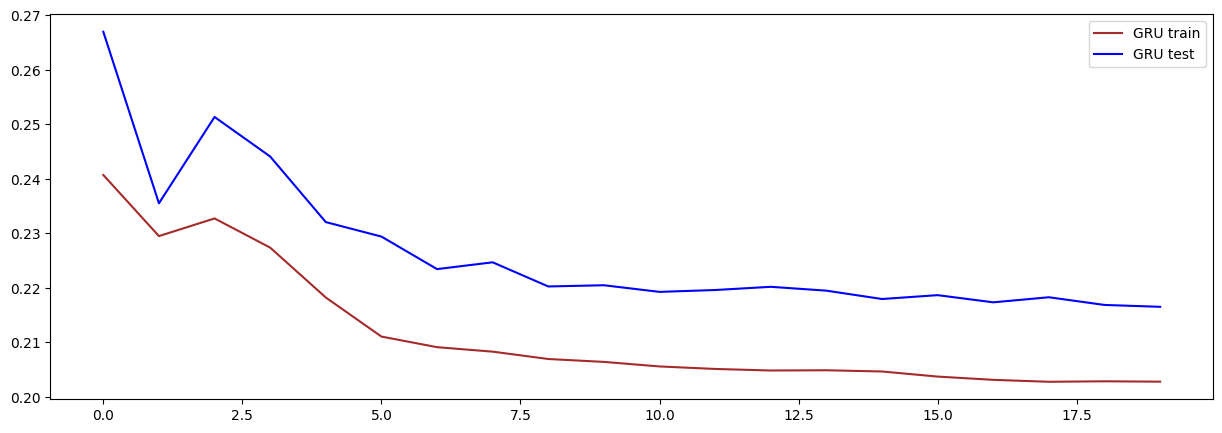

In [273]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [275]:
test_y.reshape(8086)
#test_y.reshape(2627,1)

ValueError: cannot reshape array of size 8068 into shape (8086,)

In [276]:
np.shape(pred_y)

(8068, 1)

In [277]:
pred_y

array([[0.00211401],
       [0.00209569],
       [0.00206433],
       ...,
       [0.00216593],
       [0.00216629],
       [0.00216296]], dtype=float32)

In [278]:
pred_y=np.reshape(pred_y,8068)

0.20937005137884238
-0.08608288125964836
0.4575697229699998
0.216510418124786


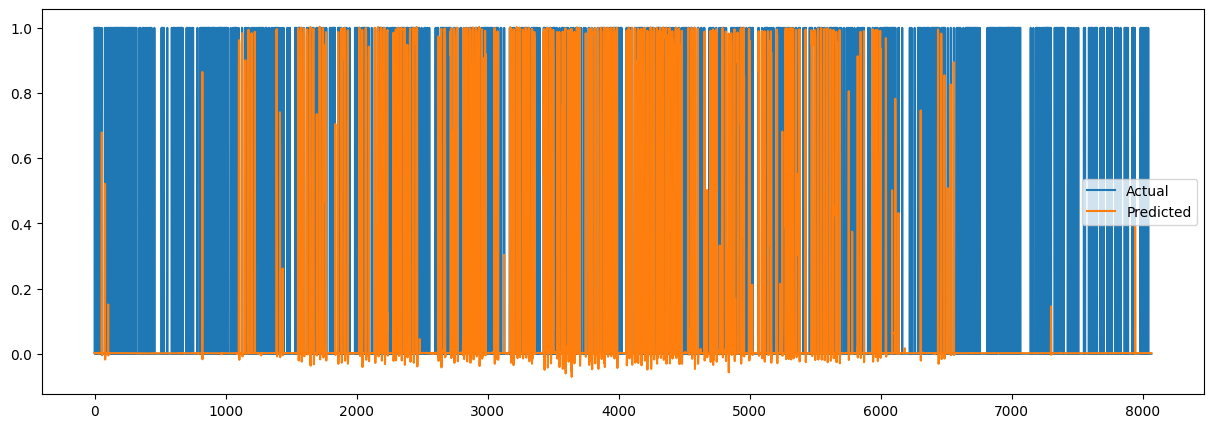

In [279]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [280]:
np.shape(train_X)

(32272, 3, 15)

In [281]:
np.shape(train_y)

(32272,)

In [282]:
np.shape(test_X)

(8068, 3, 15)

In [283]:
np.shape(test_y)

(8068,)

1261/1261 [==============================] - 5s 4ms/step


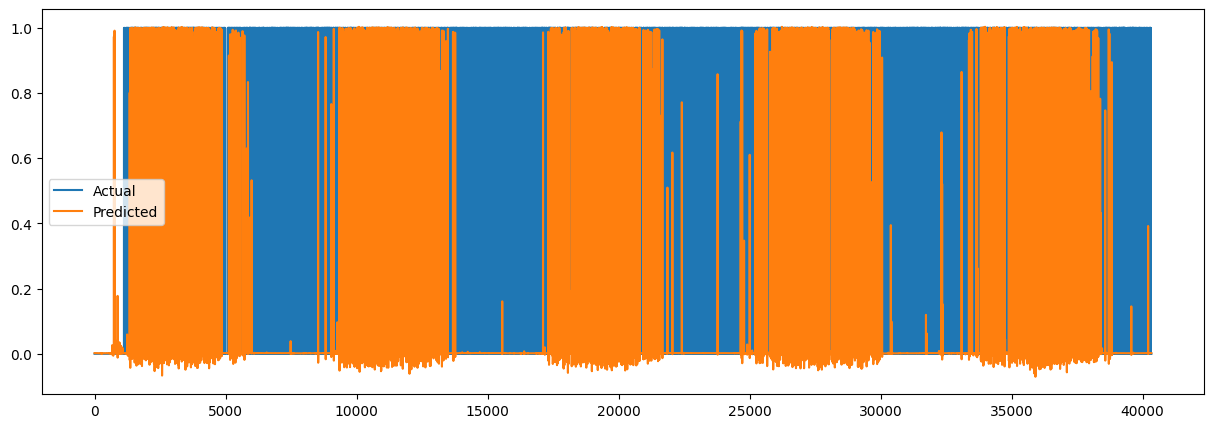

In [284]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

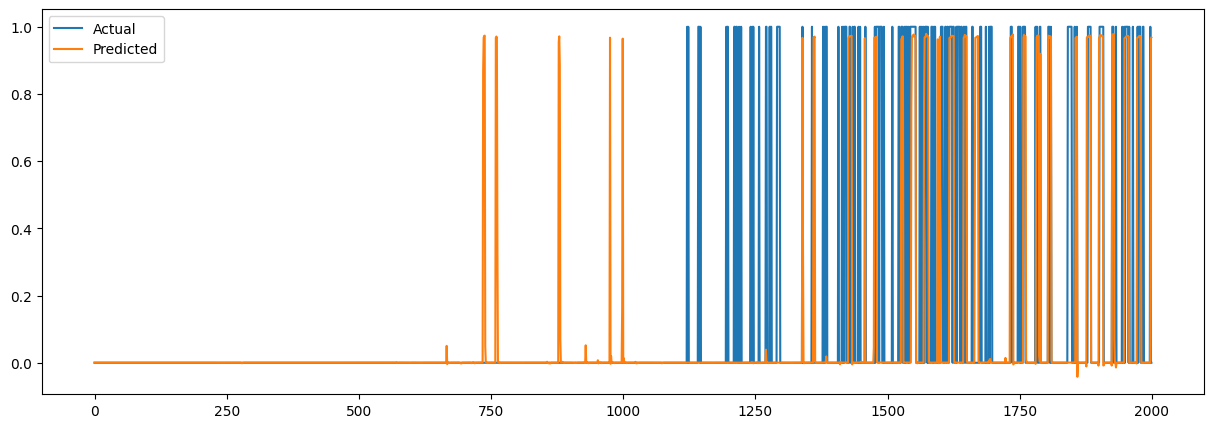

In [249]:
#over small part of data
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

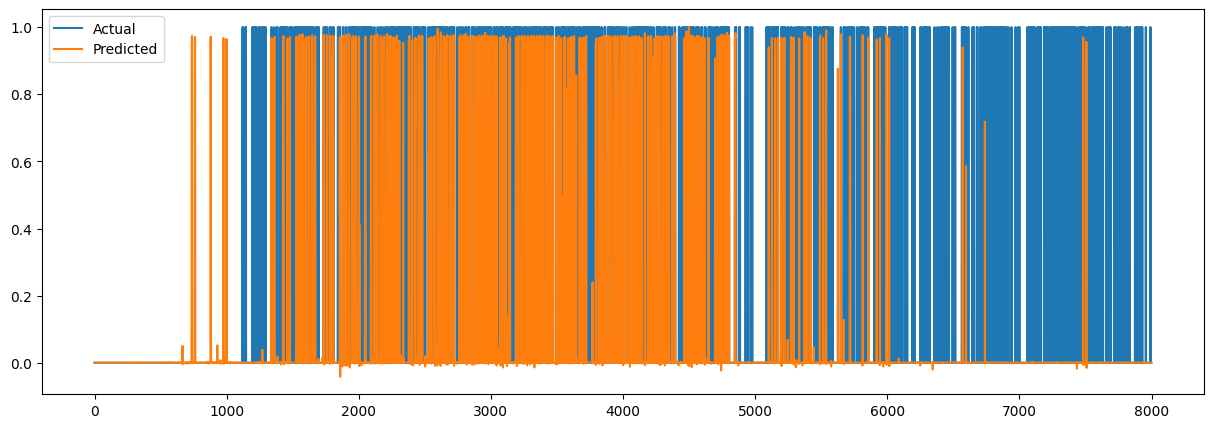

In [250]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

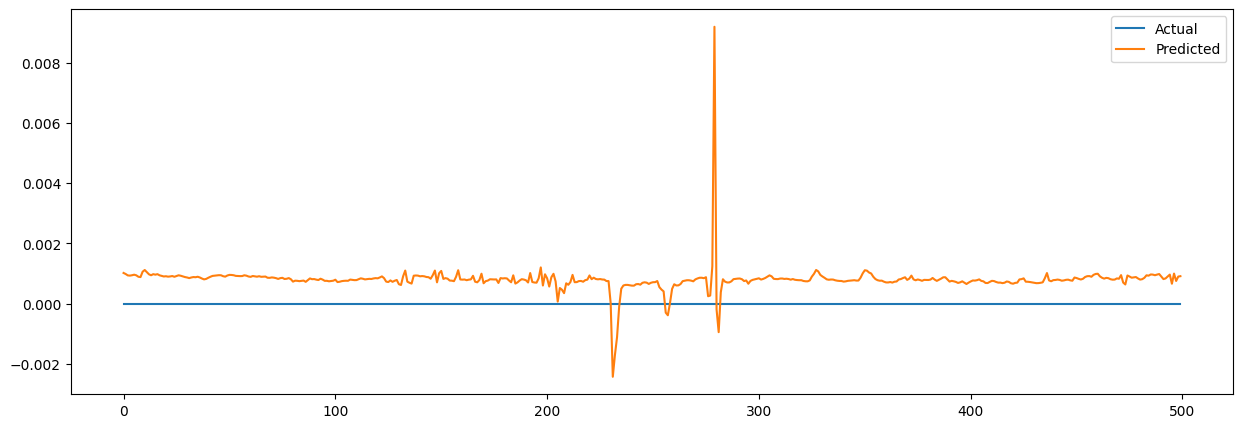

In [104]:
#over very small part of data
plt.plot(tes[:500], label = 'Actual')
plt.plot(fp[:500], label = 'Predicted')
plt.legend()
plt.show()

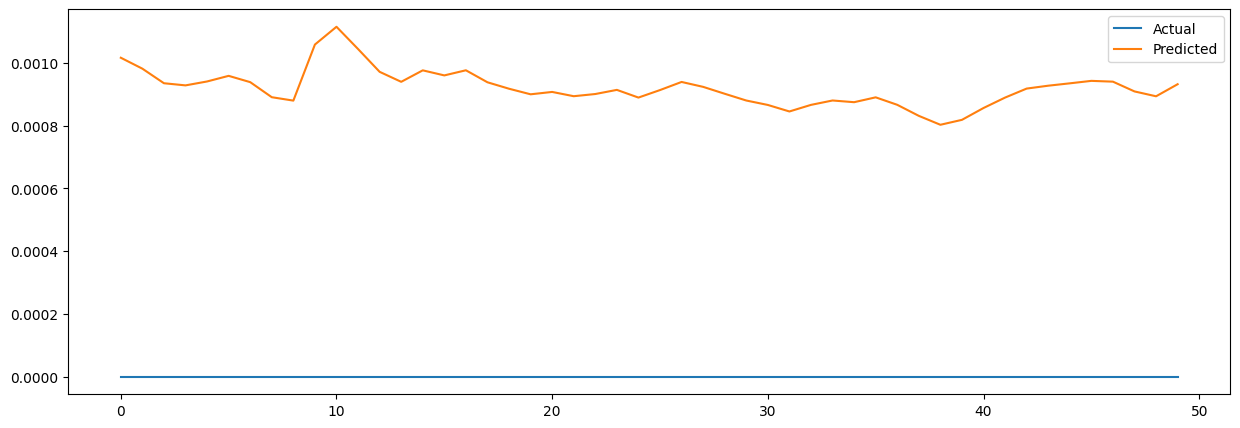

In [105]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

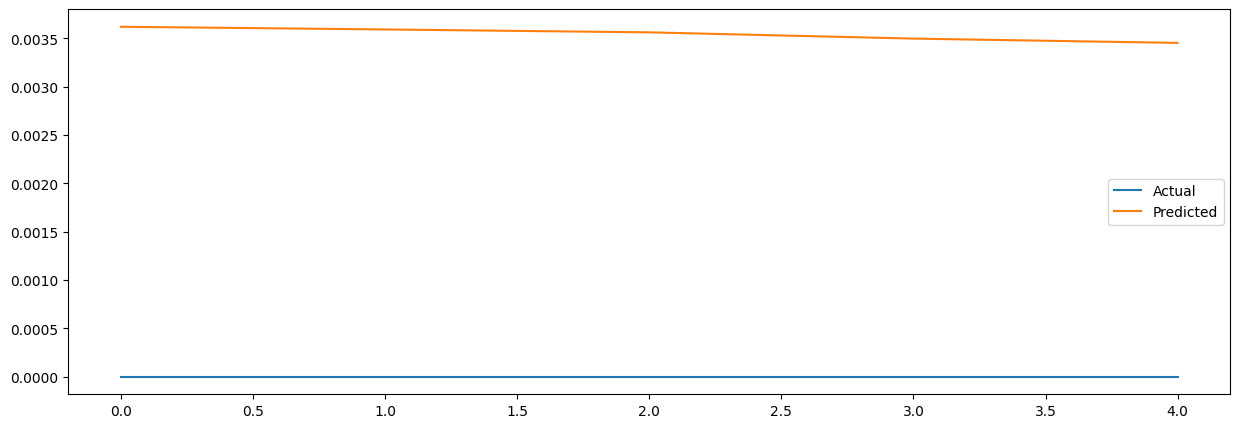

In [53]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(scaled[3], label = 'Actual')

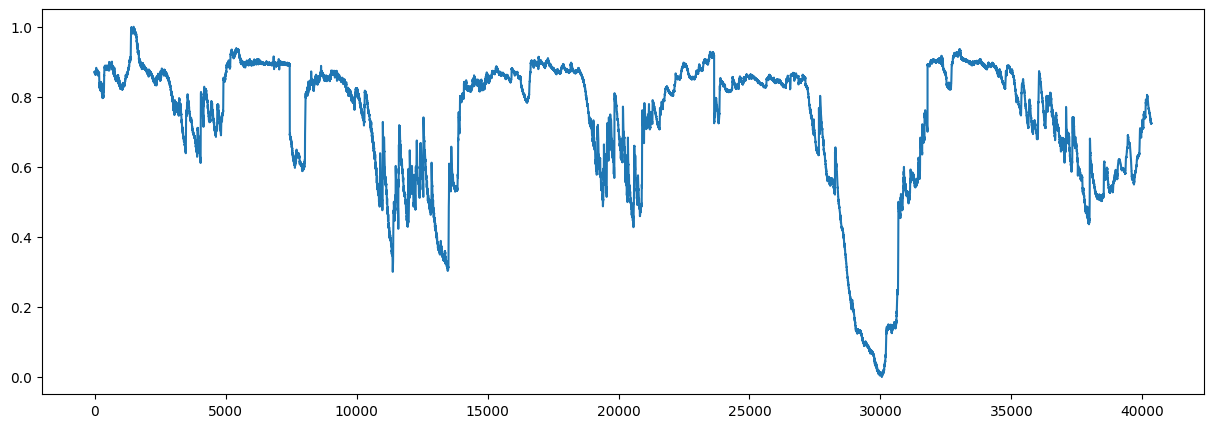

In [351]:
plt.plot(scaled[2], label = 'Actual')

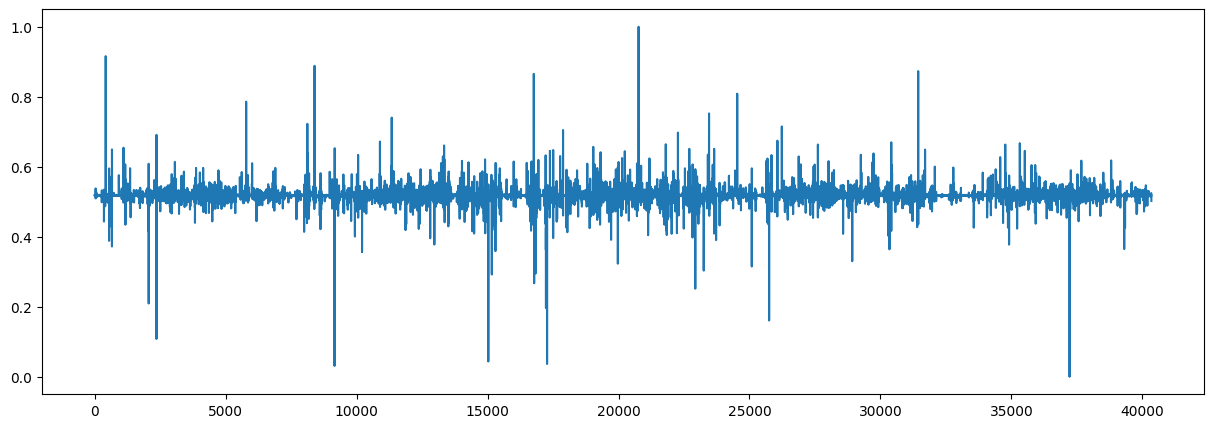

In [352]:
plt.plot(scaled[1], label = 'Actual')

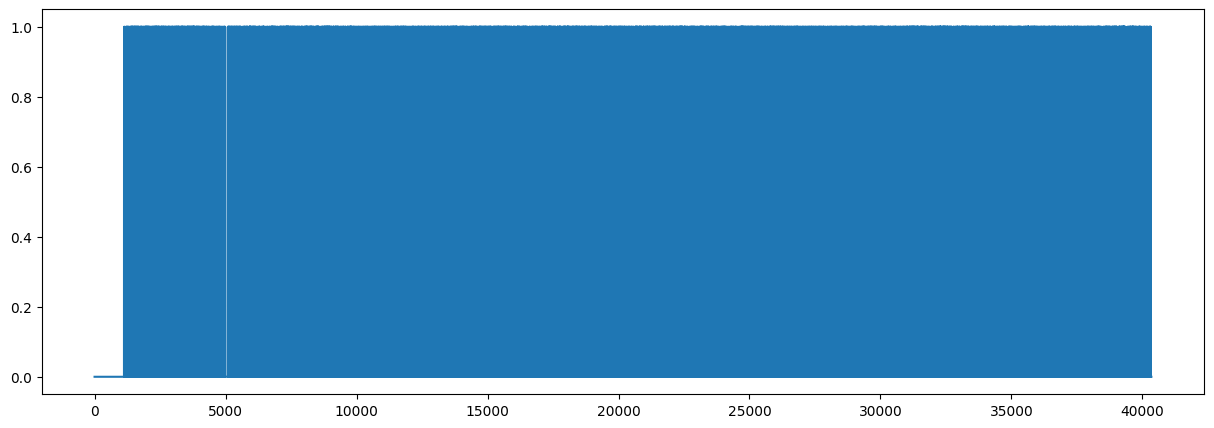

In [353]:
plt.plot(scaled[0], label = 'Actual')

In [ ]:
n_steps = 5
window_length = n_steps + 1 # zmienna docelowa = sygnał wejściowy przesunięty o jeden znak do przodu
dataset['fco2_HQ']=dataset['fco2_HQ'].astype('int64')
dataset2 = tf.data.Dataset.from_tensor_slices(dataset)
dataset2 = dataset2.repeat().window(window_length, shift=1, drop_remainder=True)

In [ ]:
dataset2 = dataset2.flat_map(lambda window: window.batch(window_length))

In [ ]:
batch_size = 32
dataset2 = dataset2.shuffle(10000).batch(batch_size)
dataset2 = dataset2.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset2 = dataset2.prefetch(1)

In [ ]:
#dataset2 = dataset2.map(
 #   lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=1, dtype=tf.float32), Y_batch))

In [ ]:
for X_batch, Y_batch in dataset2.take(1):
    print(X_batch.shape, Y_batch.shape)

In [ ]:
train_size = 40342 * 90 // 100

In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(16, return_sequences=True, input_shape=[None,16],
                     # nie ma porzucania w stanowej sieci rekurencyjnej (https://github.com/ageron/handson-ml2/issues/32)
                     # dropout=0.2, recurrent_dropout=0.2,
                     ),
    keras.layers.GRU(16, return_sequences=True,
                     # dropout=0.2, recurrent_dropout=0.2
                    ),
    keras.layers.TimeDistributed(keras.layers.Dense(1,
                                                    activation="softmax"))
])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model.compile(loss="mse", optimizer="adam")
history = model.fit(dataset2, steps_per_epoch=train_size // batch_size,epochs=10)
#history = model.fit(dataset, epochs=20,validation_data=(X_batch, Y_batch))

In [ ]:
X_new = 
Y_pred = model.predict(X_new)[:, -1,-1][..., np.newaxis]

In [269]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])